**Аналитическая задача** -- по признаковому описанию построить портрет клиента, склонного к положительному отклику на рекламное предложение.

Предполагается, что получив такую оценку для некоторого множества клиентов, компания будет обращаться только к тем из них, которые склонны к отклику.

**Описание полей**

|Признак|Расшифровка|
|--:|:--|
| AGREEMENT_RK | уникальный идентификатор объекта в выборке |
| TARGET | целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было)|
| AGE |	возраст клиента |
| SOCSTATUS_WORK_FL | социальный статус клиента относительно работы (1 - работает, 0 - не работает)|
| SOCSTATUS_PENS_FL | социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)|
| GENDER | пол клиента|
| CHILD_TOTAL | количество детей клиента|
| DEPENDANTS | количество иждивенцев клиента|
| EDUCATION | образование |
| MARITAL_STATUS | семейное положение |
| GEN_INDUSTRY | отрасль работы клиента |
| GEN_TITLE |	должность |
| ORG_TP_STATE |	форма собственности компании|
| ORG_TP_FCAPITAL |	отношение к иностранному капиталу|
| JOB_DIR |	направление деятельности внутри компании|
| FAMILY_INCOME |	семейный доход (несколько категорий)|
| PERSONAL_INCOME |	личный доход клиента (в рублях)|
| REG_ADDRESS_PROVINCE | область регистрации клиента|
| FACT_ADDRESS_PROVINCE | область фактического пребывания клиента |
| POSTAL_ADDRESS_PROVINCE |	почтовый адрес область|
| TP_PROVINCE |	область торговой точки, где клиент брал последний кредит|
| REGION_NM	| регион РФ |
| FL_PRESENCE_FL | наличие в собственности квартиры (1 - есть, 0 - нет)|
| OWN_AUTO | кол-во автомобилей в собственности| 
| AUTO_RUS_FL | наличие в собственности автомобиля российского производства ( 1 - есть, 0 - нет)|
| HS_PRESENCE_FL |	наличие в собственности загородного дома (1 - есть, 0 - нет)|
| COT_PRESENCE_FL |	наличие в собственности котеджа (1 - есть, 0 - нет) |
| GAR_PRESENCE_FL |	наличие в собственности гаража (1 - есть, 0 - нет)|
| LAND_PRESENCE_FL | наличие в собственности земельного участка (1 - есть, 0 - нет)|
| FACT_LIVING_TERM | количество месяцев проживания по месту фактического пребывания |
| WORK_TIME | время работы на текущем месте (в месяцах) |
| CREDIT | сумма последнего кредита клиента (в рублях) |
| TERM | срок кредита, мес.|
| LOAN_NUM_PAYM | количество платежей, которые сделал клиент | 
| LOAN_DLQ_NUM | количество просрочек, допущенных клиентом |
| LOAN_MAX_DLQ_AMT | максимальная сумма просрочки (в рублях) |
| DATE_CREDIT | дата взятия кредита |

**Примерный план по выполнению проекта**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения.

Шаг 3. Добавьте в таблицу следующие признаки:
- день недели, месяц и год взятия кредита;
- адрес регистрации и адрес фактического пребывания клиента совпадают (1 -- совпадает, 0 -- не совпадает);
- адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают);
- область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают);

Шаг 4. Провести исследовательский анализ данных:
- исследовать динамику количества кредитов по годам, месяцам;
- исследовать числовые и категориальные признаки в разрезе целевого признака;
- сделать выводы о влиянии признаков на целевой признак. 

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('dataset_target_company.csv')
df

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ_AMT,DATE_CREDIT
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000.0,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,0,0,0,0,0,0,0,8000.00,6,220,18.0,6,2,1580.0,2017-10-01 15:09:09
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,0,0,0,0,0,0,0,21650.00,6,137,97.0,6,1,4020.0,2020-10-09 18:58:35
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000.0,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,0,0,0,1,0,0,0,33126.00,12,251,84.0,11,0,0.0,2015-05-05 11:10:07
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000.0,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,1,0,0,0,0,0,0,8491.82,6,36,168.0,6,3,1590.0,2016-06-19 10:05:49
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.0,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,0,0,0,1,0,0,0,21990.00,12,83,101.0,16,2,2230.0,2016-03-13 14:22:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424,0,25,1,0,0,1,1,Среднее,Состою в браке,Строительство,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.0,Воронежская область,Воронежская область,Воронежская область,Воронежская область,ЦЕНТРАЛЬНЫЙ 2,0,0,0,0,0,0,0,13450.00,10,121,48.0,21,0,0.0,2018-04-11 17:38:21
15219,75291888,0,51,1,0,1,2,0,Среднее специальное,Состою в браке,Здравоохранение,Другое,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,10000.0,Башкирия,Башкирия,Башкирия,Челябинская область,УРАЛЬСКИЙ,0,0,0,0,0,0,0,8991.00,6,300,156.0,3,0,0.0,2021-12-21 18:09:58
15220,75291923,0,22,1,0,1,1,1,Среднее,Не состоял в браке,Торговля,Служащий,Индивидуальный предприниматель,Без участия,Кадровая служба и секретариат,от 5000 до 10000 руб.,6000.0,Брянская область,Брянская область,Брянская область,Брянская область,ЦЕНТРАЛЬНЫЙ 1,0,0,0,0,0,0,0,2700.00,6,48,48.0,5,0,0.0,2016-11-26 10:13:32
15221,75291960,0,60,0,1,1,2,0,Среднее,Вдовец/Вдова,NaN,NaN,NaN,NaN,NaN,от 10000 до 20000 руб.,4500.0,Приморский край,Приморский край,Приморский край,Приморский край,ДАЛЬНЕВОСТОЧНЫЙ,1,0,0,0,0,0,0,24357.00,10,270,NaN,3,0,0.0,2017-04-07 11:27:54


#### <center>Первичная обработка данных.

Для начала переимеименуем название столбцов.

In [6]:
data = df.copy()
data = data.rename(columns = {'AGREEMENT_RK': 'id', 
                       'TARGET': 'reaction', 
                       'AGE': 'age', 
                       'SOCSTATUS_WORK_FL': 'work_status', 
                       'SOCSTATUS_PENS_FL': 'status_pens',
                      'GENDER': 'gender', 
                       'CHILD_TOTAL': 'children', 
                       'DEPENDANTS': 'izh', 
                       'EDUCATION': 'education', 
                       'MARITAL_STATUS': 'marriage', 
                      'GEN_INDUSTRY': 'where_work', 
                       'GEN_TITLE': 'work_tittle', 
                       'ORG_TP_STATE': 'org', 
                       'ORG_TP_FCAPITAL': 'capital_abroad', 
                       'JOB_DIR': 'work_departament', 
                       'FAMILY_INCOME': 'family_income', 
                       'PERSONAL_INCOME': 'pers_income', 
                       'REG_ADDRESS_PROVINCE': 'reg_address', 
                       'FACT_ADDRESS_PROVINCE': 'fact_address', 'POSTAL_ADDRESS_PROVINCE': 'post_address', 
                      'TP_PROVINCE': 'region_tt_credit', 
                       'REGION_NM': 'region', 
                       'FL_PRESENCE_FL': 'home', 
                       'OWN_AUTO': 'auto', 'AUTO_RUS_FL':'rus_auto',
                       'HS_PRESENCE_FL': 'house_out_city', 'COT_PRESENCE_FL': 'big_house', 'GAR_PRESENCE_FL': 'garage', 'LAND_PRESENCE_FL': 'own_land',
                       'FACT_LIVING_TERM': 'how_living_in_fact', 
                       'WORK_TIME': 'time_month_work', 
                       'CREDIT': 'summa_credit', 'TERM': 'time_credit',
                       'LOAN_NUM_PAYM': 'payment', 'LOAN_DLQ_NUM': 'time_not_pay', 'LOAN_MAX_DLQ_AMT': 'max_sum_not_pay', 
                       'DATE_CREDIT':'date_credit'})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  15223 non-null  int64  
 1   reaction            15223 non-null  int64  
 2   age                 15223 non-null  int64  
 3   work_status         15223 non-null  int64  
 4   status_pens         15223 non-null  int64  
 5   gender              15223 non-null  int64  
 6   children            15223 non-null  int64  
 7   izh                 15223 non-null  int64  
 8   education           15223 non-null  object 
 9   marriage            15223 non-null  object 
 10  where_work          13856 non-null  object 
 11  work_tittle         13856 non-null  object 
 12  org                 13856 non-null  object 
 13  capital_abroad      13858 non-null  object 
 14  work_departament    13856 non-null  object 
 15  family_income       15223 non-null  object 
 16  pers

Рассмотрим, что содержится в каждом признаке

In [9]:
for col in data: 
    print(f'----- признак {col} -----')
    print(data[col].unique())
    print('--'*5)

----- признак id -----
[59910150 59910230 59910525 ... 75291923 75291960 75292242]
----------
----- признак reaction -----
[0 1]
----------
----- признак age -----
[49 32 52 39 30 29 35 41 53 43 54 26 62 45 38 65 34 28 37 42 33 27 31 40
 63 61 44 59 48 24 23 47 58 51 56 22 36 57 50 46 55 66 25 60 64 21 67]
----------
----- признак work_status -----
[1 0]
----------
----- признак status_pens -----
[0 1]
----------
----- признак gender -----
[1 0]
----------
----- признак children -----
[ 2  3  4  1  0  5  6  7  8 10]
----------
----- признак izh -----
[1 3 0 2 4 5 6 7]
----------
----- признак education -----
['Среднее специальное' 'Среднее' 'Неполное среднее' 'Высшее'
 'Неоконченное высшее' 'Два и более высших образования' 'Ученая степень']
----------
----- признак marriage -----
['Состою в браке' 'Гражданский брак' 'Разведен(а)' 'Не состоял в браке'
 'Вдовец/Вдова']
----------
----- признак where_work -----
['Торговля' 'Информационные технологии' 'Образование'
 'Государственная служба

Изучив типы столбиков и их содержание, было решено только перевести 36 столбик "date_credit" в формат дата.

In [11]:
data = data.astype({'date_credit': 'datetime64[ns]'},
               errors='ignore')
# data.dtypes

In [12]:
print(f'Количество дублирующихся записей - {data.duplicated().sum()}.')

Количество дублирующихся записей - 0.


Изучим количество пропущенных значений в каждом столбике.

In [14]:
data.isnull().sum()

id                       0
reaction                 0
age                      0
work_status              0
status_pens              0
gender                   0
children                 0
izh                      0
education                0
marriage                 0
where_work            1367
work_tittle           1367
org                   1367
capital_abroad        1365
work_departament      1367
family_income            0
pers_income              0
reg_address              0
fact_address             0
post_address             0
region_tt_credit       295
region                   1
home                     0
auto                     0
rus_auto                 0
house_out_city           0
big_house                0
garage                   0
own_land                 0
summa_credit             0
time_credit              0
how_living_in_fact       0
time_month_work       1368
payment                  0
time_not_pay             0
max_sum_not_pay          0
date_credit              0
d

Большинство пропусков в стобцах с местом, департаментом и временем работы. Возможно данные пропуски связаны с рабочим статусом человека - 0 (безработный)

In [16]:
data[['id', 'work_status', 'work_tittle', 'where_work', 'work_departament', 'time_month_work']].loc[data['work_status'] == 0]

,id,work_status,work_tittle,where_work,work_departament,time_month_work
12,59913134,0,Рабочий,Металлургия/Промышленность/Машиностроение,Участие в основ. деятельности,48.0
16,59913603,0,NaN,NaN,NaN,NaN
29,59914912,0,NaN,NaN,NaN,NaN
40,59915354,0,NaN,NaN,NaN,NaN
43,59915500,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15185,75287816,0,NaN,NaN,NaN,NaN
15191,75288307,0,NaN,NaN,NaN,NaN
15196,75288884,0,NaN,NaN,NaN,NaN
15197,75288922,0,NaN,NaN,NaN,NaN


Действительно, большинство пропусков в стобцах с местом, департаментом и временем работы находится в строках с рабочим статусом - 0, т.е у безроботных. Заменим данные пропуски на "Не работает".     
Также существует ошибка со статусом "0", у клиента, у которого указано место, департамент и время работы. Здесь возможны два варианта, либо это ошибка данных в столбце статус, либо статус поменялся, а данные о работе, остались с предыдущего места.

In [18]:
data['work_tittle'] = np.where((data['work_status']==0), np.where(data['work_tittle'].isna(),'Не работает', data['work_tittle']), data['work_tittle'])

data['where_work'] = np.where((data['work_status']==0), np.where(data['where_work'].isna(),'Не работает', data['where_work']), data['where_work'])

data['work_departament'] = np.where((data['work_status']==0), np.where(data['work_departament'].isna(),'Не работает', data['work_departament']), data['work_departament'])

data['time_month_work'] = np.where((data['work_status']==0), np.where(data['time_month_work'].isna(),'Не работает', data['time_month_work']), data['time_month_work'])


In [19]:
data[['age', 'work_status', 'work_tittle', 'where_work', 'work_departament', 'time_month_work']].loc[data['work_status'] == 0]

,age,work_status,work_tittle,where_work,work_departament,time_month_work
12,62,0,Рабочий,Металлургия/Промышленность/Машиностроение,Участие в основ. деятельности,48.0
16,65,0,Не работает,Не работает,Не работает,Не работает
29,63,0,Не работает,Не работает,Не работает,Не работает
40,61,0,Не работает,Не работает,Не работает,Не работает
43,59,0,Не работает,Не работает,Не работает,Не работает
...,...,...,...,...,...,...
15185,55,0,Не работает,Не работает,Не работает,Не работает
15191,64,0,Не работает,Не работает,Не работает,Не работает
15196,64,0,Не работает,Не работает,Не работает,Не работает
15197,61,0,Не работает,Не работает,Не работает,Не работает


In [20]:
data[['age', 'work_status', 'status_pens', 'work_tittle', 'where_work', 'work_departament', 'time_month_work', 'date_credit']].loc[(data['work_status'] == 0)  & (data['work_tittle']!='Не работает')]

,age,work_status,status_pens,work_tittle,where_work,work_departament,time_month_work,date_credit
12,62,0,1,Рабочий,Металлургия/Промышленность/Машиностроение,Участие в основ. деятельности,48.0,2019-11-24 18:10:12
5767,52,0,1,Специалист,Другие сферы,Участие в основ. деятельности,36.0,2019-09-24 13:13:41
7918,62,0,1,Служащий,Сельское хозяйство,Участие в основ. деятельности,120.0,2016-01-10 10:52:26
8210,55,0,1,Руководитель среднего звена,Образование,Участие в основ. деятельности,420.0,2018-07-04 16:15:54
9847,55,0,1,Специалист,Строительство,Участие в основ. деятельности,Не работает,2016-04-15 11:26:32
10005,65,0,1,Рабочий,Ресторанный бизнес/Общественное питание,Участие в основ. деятельности,36.0,2018-09-01 13:32:04
11599,44,0,1,Служащий,Другие сферы,Участие в основ. деятельности,9.0,2021-09-17 10:46:01
12089,51,0,1,Специалист,Металлургия/Промышленность/Машиностроение,Участие в основ. деятельности,360.0,2017-10-07 10:20:44
12869,54,0,1,Рабочий,Образование,Снабжение и сбыт,7.0,2019-10-29 17:13:18
13515,50,0,1,Работник сферы услуг,Образование,Вспомогательный техперсонал,240.0,2021-03-19 12:08:25


Данные люди уже вышли на пенсию и соответственно остались данные о их последнем месте работы и стаже. 

#### <center>Задание: 
Добавьте в таблицу следующие признаки:
- день недели, месяц и год взятия кредита;
- адрес регистрации и адрес фактического пребывания клиента совпадают (1 -- совпадает, 0 -- не совпадает);
- адрес фактического пребывания клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- адрес регистрации клиента и его почтовый адрес совпадают(1 -- совпадает, 0 -- не совпадает);
- почтовый, фактический и адрес регистрации совпадают (1 -- совпадают, 0 -- не совпадают);
- область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают (1 -- совпадают, 0 -- не совпадают);

In [23]:
data['data_credit_year'] = data['date_credit'].dt.year

data['data_credit_month'] = data['date_credit'].dt.month

data['data_name_month'] = data['date_credit'].dt.month_name()

data['data_credit_day'] = data['date_credit'].dt.weekday

data['data_day_name'] = data['date_credit'].dt.day_name()

data[['date_credit', 'data_credit_year', 'data_credit_month', 'data_credit_day', 'data_day_name']]

,date_credit,data_credit_year,data_credit_month,data_credit_day,data_day_name
0,2017-10-01 15:09:09,2017,10,6,Sunday
1,2020-10-09 18:58:35,2020,10,4,Friday
2,2015-05-05 11:10:07,2015,5,1,Tuesday
3,2016-06-19 10:05:49,2016,6,6,Sunday
4,2016-03-13 14:22:06,2016,3,6,Sunday
...,...,...,...,...,...
15218,2018-04-11 17:38:21,2018,4,2,Wednesday
15219,2021-12-21 18:09:58,2021,12,1,Tuesday
15220,2016-11-26 10:13:32,2016,11,5,Saturday
15221,2017-04-07 11:27:54,2017,4,4,Friday


In [24]:
data['fact_and_real_ad'] =  np.where(data['fact_address']== data['reg_address'], 1, 0)

In [25]:
data['fact_and_post_ad'] =  np.where(data['fact_address']== data['post_address'], 1, 0)

In [26]:
data['fact_real_post_ad'] =  np.where(data['fact_and_post_ad'] == data['fact_and_real_ad'], 1, 0)

In [27]:
reg1 =  np.where(data['reg_address'] == data['region_tt_credit'], 1, 0)
data['region_where_crediat'] =  np.where(data['fact_and_post_ad'] == reg1, 1, 0)

In [28]:
data[['fact_address', 'reg_address', 'fact_and_real_ad', 'post_address', 'fact_real_post_ad', 'region_tt_credit', 'region_where_crediat']]

,fact_address,reg_address,fact_and_real_ad,post_address,fact_real_post_ad,region_tt_credit,region_where_crediat
0,Оренбургская область,Оренбургская область,1,Оренбургская область,1,Оренбургская область,1
1,Кабардино-Балкария,Кабардино-Балкария,1,Кабардино-Балкария,1,Ставропольский край,0
2,Иркутская область,Иркутская область,1,Иркутская область,1,Иркутская область,1
3,Ростовская область,Ростовская область,1,Ростовская область,1,Ростовская область,1
4,Кабардино-Балкария,Кабардино-Балкария,1,Кабардино-Балкария,1,Ставропольский край,0
...,...,...,...,...,...,...,...
15218,Воронежская область,Воронежская область,1,Воронежская область,1,Воронежская область,1
15219,Башкирия,Башкирия,1,Башкирия,1,Челябинская область,0
15220,Брянская область,Брянская область,1,Брянская область,1,Брянская область,1
15221,Приморский край,Приморский край,1,Приморский край,1,Приморский край,1


#### <center>Исследовательский анализ данных
- исследовать динамику количества кредитов по годам, месяцам;
- исследовать числовые и категориальные признаки в разрезе целевого признака;
- сделать выводы о влиянии признаков на целевой признак. 

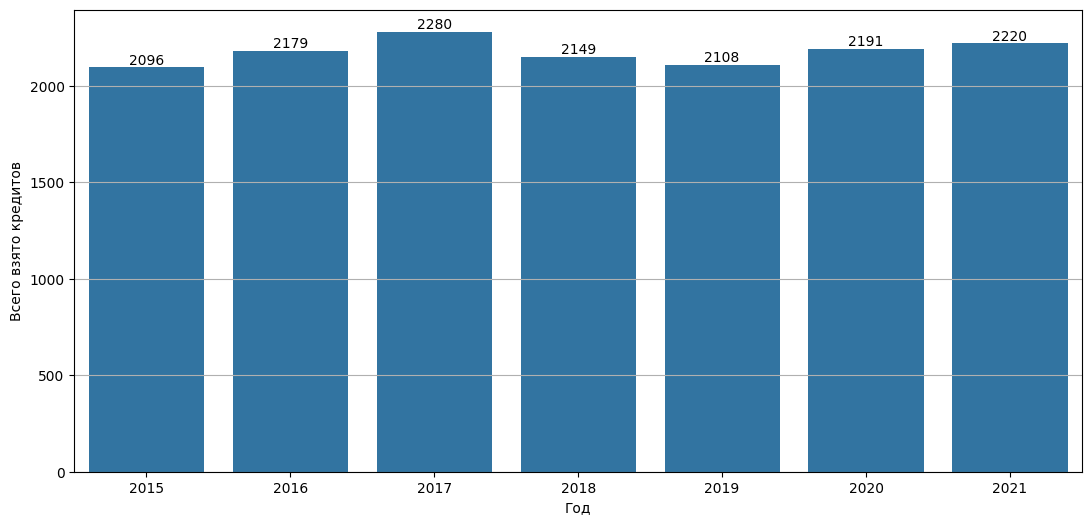

In [30]:
plt.figure(figsize=(13, 6))
ax = sns.countplot(data=data,
                   x='data_credit_year')

ax.set_xlabel('Год');
ax.set_ylabel('Всего взято кредитов');

for container in ax.containers:
    ax.bar_label(container);
    
plt.grid(axis='y')


C:\Users\user\AppData\Local\Temp\ipykernel_6344\171007183.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),


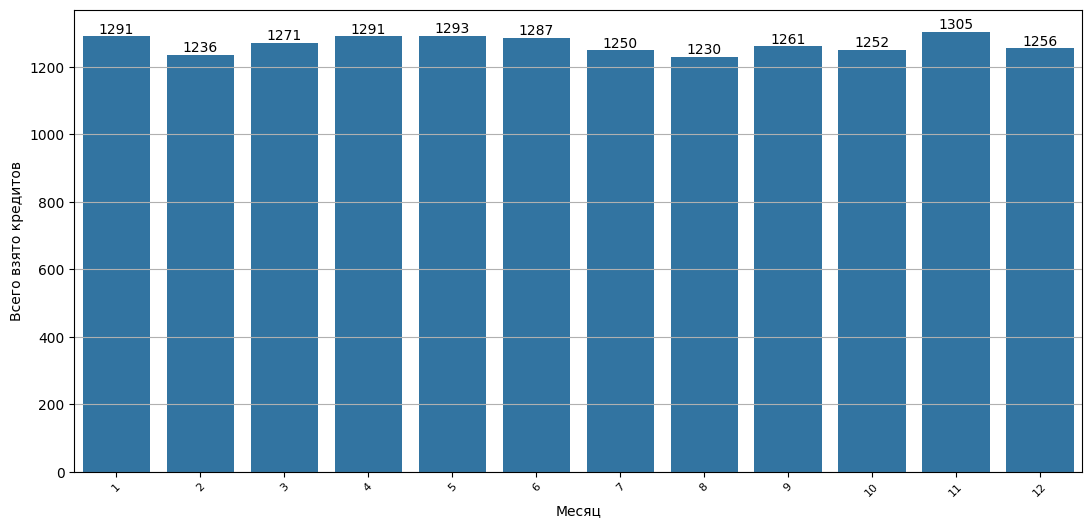

In [31]:
plt.figure(figsize=(13, 6))
ax = sns.countplot(data=data,
                   x='data_credit_month')

ax.set_xlabel('Месяц');
ax.set_ylabel('Всего взято кредитов');

ax.set_xticklabels(ax.get_xticklabels(),
                   fontsize=8,
                   rotation=45);

for container in ax.containers:
    ax.bar_label(container);
    
plt.grid(axis='y')


Рассмотрим сколько всего человек откликнулось.

In [33]:
data['reaction'].value_counts()

reaction
0    13411
1     1812
Name: count, dtype: int64

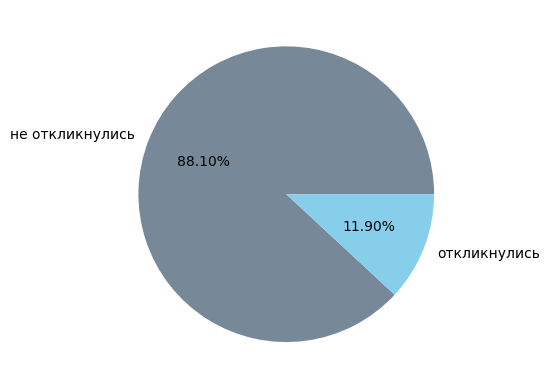

In [34]:
label = ['не откликнулись',  'откликнулись']
fig, axs = plt.subplots()
axs.pie(data['reaction'].value_counts(), labels=label, autopct='%1.2f%%', colors= ['#778899', '#87CEEB'])


plt.show()

Итак, всего 1 812 (или в процентном соотношении - 11,9%) человек откликнулись. Далее изучим наиболее часто встречающиеся признаки среди откликнувшихся и составим портрет клиента.

In [36]:
data1 = data[data['reaction'] == 1]
data1

,id,reaction,age,work_status,status_pens,gender,children,izh,education,marriage,where_work,work_tittle,org,capital_abroad,work_departament,family_income,pers_income,reg_address,fact_address,post_address,region_tt_credit,region,home,auto,rus_auto,house_out_city,big_house,garage,own_land,summa_credit,time_credit,how_living_in_fact,time_month_work,payment,time_not_pay,max_sum_not_pay,date_credit,data_credit_year,data_credit_month,data_name_month,data_credit_day,data_day_name,fact_and_real_ad,fact_and_post_ad,fact_real_post_ad,region_where_crediat
11,59913108,1,26,1,0,0,0,0,Среднее специальное,Не состоял в браке,Другие сферы,Работник сферы услуг,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,18000.0,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,0,0,0,0,0,0,0,11751.0,4,49,27.0,13,0,0.00,2017-05-02 17:28:35,2017,5,May,1,Tuesday,1,1,1,1
12,59913134,1,62,0,1,0,3,0,Среднее,Гражданский брак,Металлургия/Промышленность/Машиностроение,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000.0,Калужская область,Калужская область,Калужская область,Калужская область,ЦЕНТРАЛЬНЫЙ 1,0,1,1,0,0,0,0,11160.0,3,324,48.0,3,0,0.00,2019-11-24 18:10:12,2019,11,November,6,Sunday,1,1,1,1
15,59913542,1,41,1,0,1,0,0,Высшее,Разведен(а),Торговля,Индивидуальный предприниматель,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,свыше 50000 руб.,60000.0,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,1,0,0,0,0,0,0,79910.0,5,5,168.0,4,0,0.00,2018-01-29 10:30:38,2018,1,January,0,Monday,1,1,1,1
18,59913736,1,34,1,0,0,0,0,Среднее,Гражданский брак,Строительство,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,свыше 50000 руб.,35000.0,Камчатская область,Камчатская область,Камчатская область,Камчатская область,ДАЛЬНЕВОСТОЧНЫЙ,0,0,0,0,0,0,0,7290.0,6,84,13.0,5,1,1439.94,2017-05-31 14:49:38,2017,5,May,2,Wednesday,1,1,1,1
27,59914760,1,31,1,0,1,1,1,Среднее специальное,Состою в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,12000.0,Амурская область,Амурская область,Амурская область,Амурская область,ДАЛЬНЕВОСТОЧНЫЙ,0,0,0,0,0,0,0,30198.0,6,163,15.0,6,2,5760.00,2019-05-18 16:29:38,2019,5,May,5,Saturday,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15183,75287779,1,31,1,0,0,1,1,Высшее,Состою в браке,Транспорт,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,15000.0,Северная Осетия,Северная Осетия,Северная Осетия,Ставропольский край,ЮЖНЫЙ,0,0,0,0,0,0,0,7390.0,6,252,30.0,4,0,0.00,2018-10-28 15:38:10,2018,10,October,6,Sunday,1,1,1,0
15200,75289115,1,34,1,0,0,2,2,Среднее,Состою в браке,Сельское хозяйство,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,8000.0,Белгородская область,Белгородская область,Белгородская область,Воронежская область,ЦЕНТРАЛЬНЫЙ 2,1,0,0,0,0,0,0,3540.0,6,216,36.0,11,3,605.59,2015-03-20 16:02:36,2015,3,March,4,Friday,1,1,1,0
15204,75289366,1,43,1,0,0,0,0,Среднее,Состою в браке,Металлургия/Промышленность/Машиностроение,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000.0,Омская область,Омская область,Омская область,Омская область,ЗАПАДНО-СИБИРСКИЙ,0,0,0,0,0,0,0,5130.0,12,303,27.0,3,0,0.00,2015-02-07 10:02:32,2015,2,February,5,Saturday,1,1,1,1
15209,75289867,1,48,1,0,1,0,0,Среднее специальное,Не состоял в браке,Сборочные производства,Рабочий,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000.0,Калужская область,Калужская область,Калужская область,Калужская область,ЦЕНТРАЛЬНЫЙ 1,1,0,0,0,0,0,0,3424.0,3,288,6.0,3,0,0.00,2020-02-17 14:35:10,2020,2,February,0,Monday,1,1,1,1


Разделим признаки на числовые и категориальные.

In [38]:
# числовые
lst_ch = ['pers_income', 'summa_credit', 'time_credit', 'how_living_in_fact', 'payment', 'time_not_pay', 'max_sum_not_pay']
# категориальные
lst_cat = ['age', 'work_status', 'status_pens', 'gender', 'children', 'izh', 'education', 'where_work', 'work_title', 'org', 'capital_abroad', 
           'work_departament','reg_address',  'fact_address', 'region_tt_credit', 'region', 'home', 'auto', 'rus_auto', 'house_out_city', 'big_house', 
           'family_income', 'garage', 'own_land']

Уберем пару пунктов из списка категориальных признаков, поскольку там довольно большое количество вариантов и длинные названия, на графике тяжело будет прочитать, рассмотрим их после построение гистограм: 'where_work', 'work_departament', 'work_tittle', 'region_tt_credit'.

In [40]:
lst_cat2 = ['age', 'work_status', 'status_pens', 'gender', 'children', 'izh', 'education', 'org', 'capital_abroad',
            'region', 'home', 'auto', 'rus_auto', 'house_out_city', 'big_house', 
           'family_income', 'garage', 'own_land']

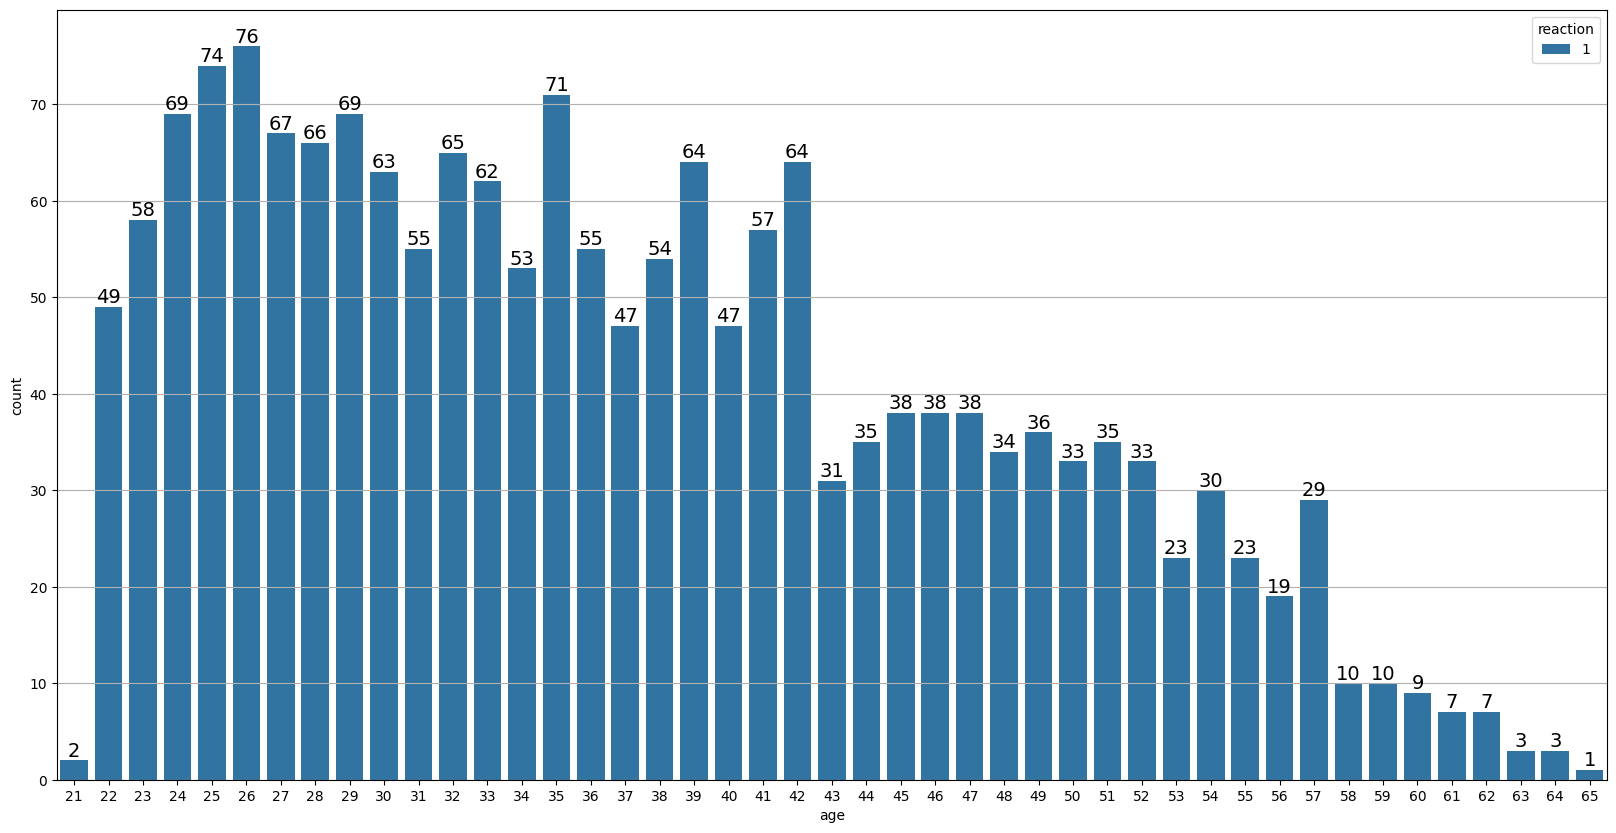

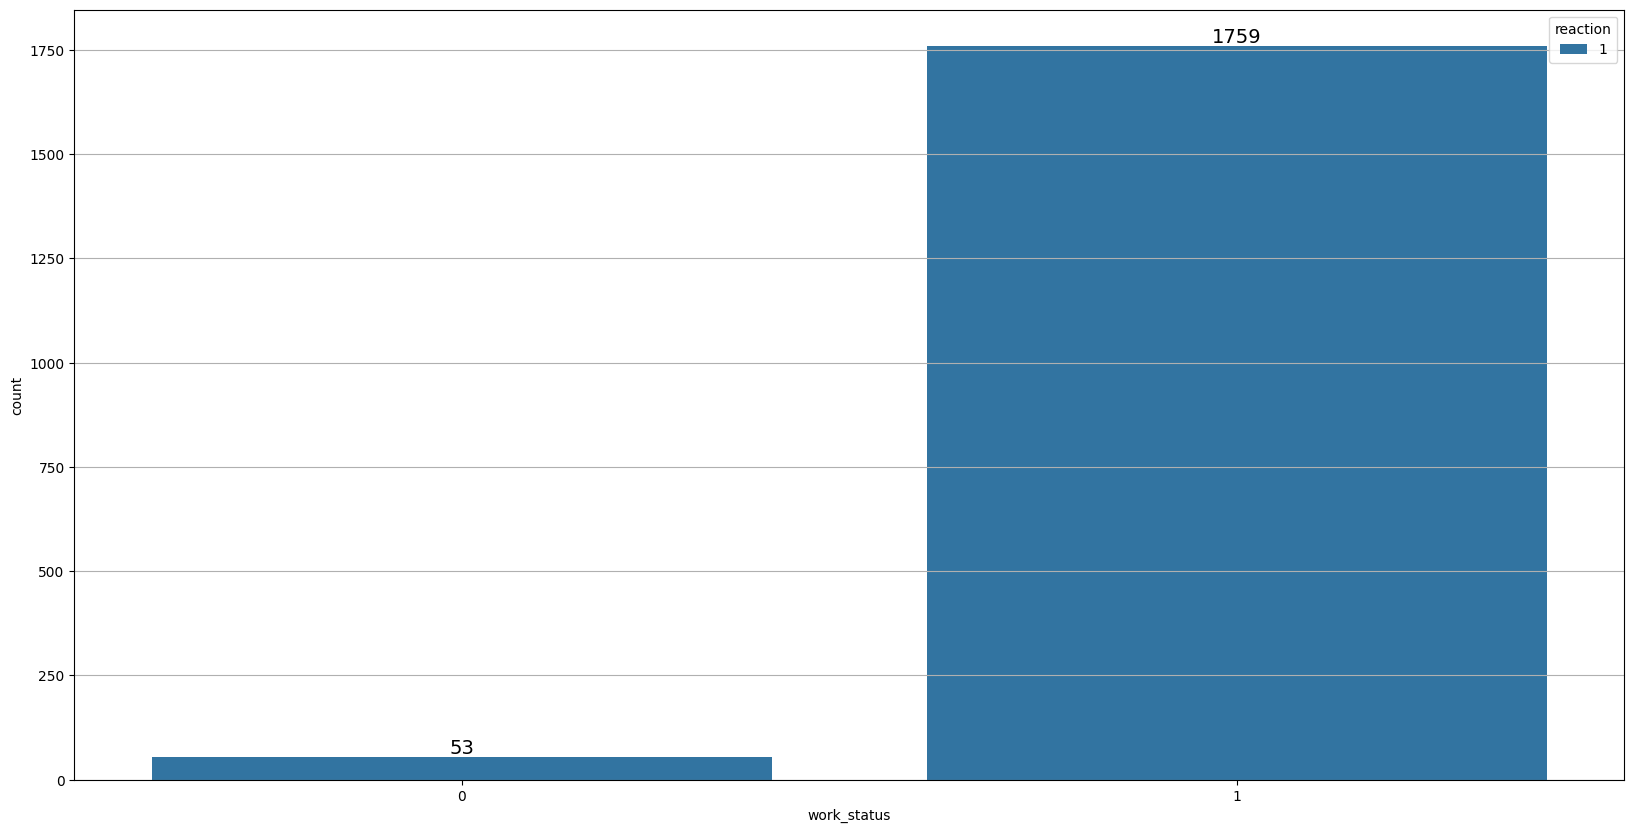

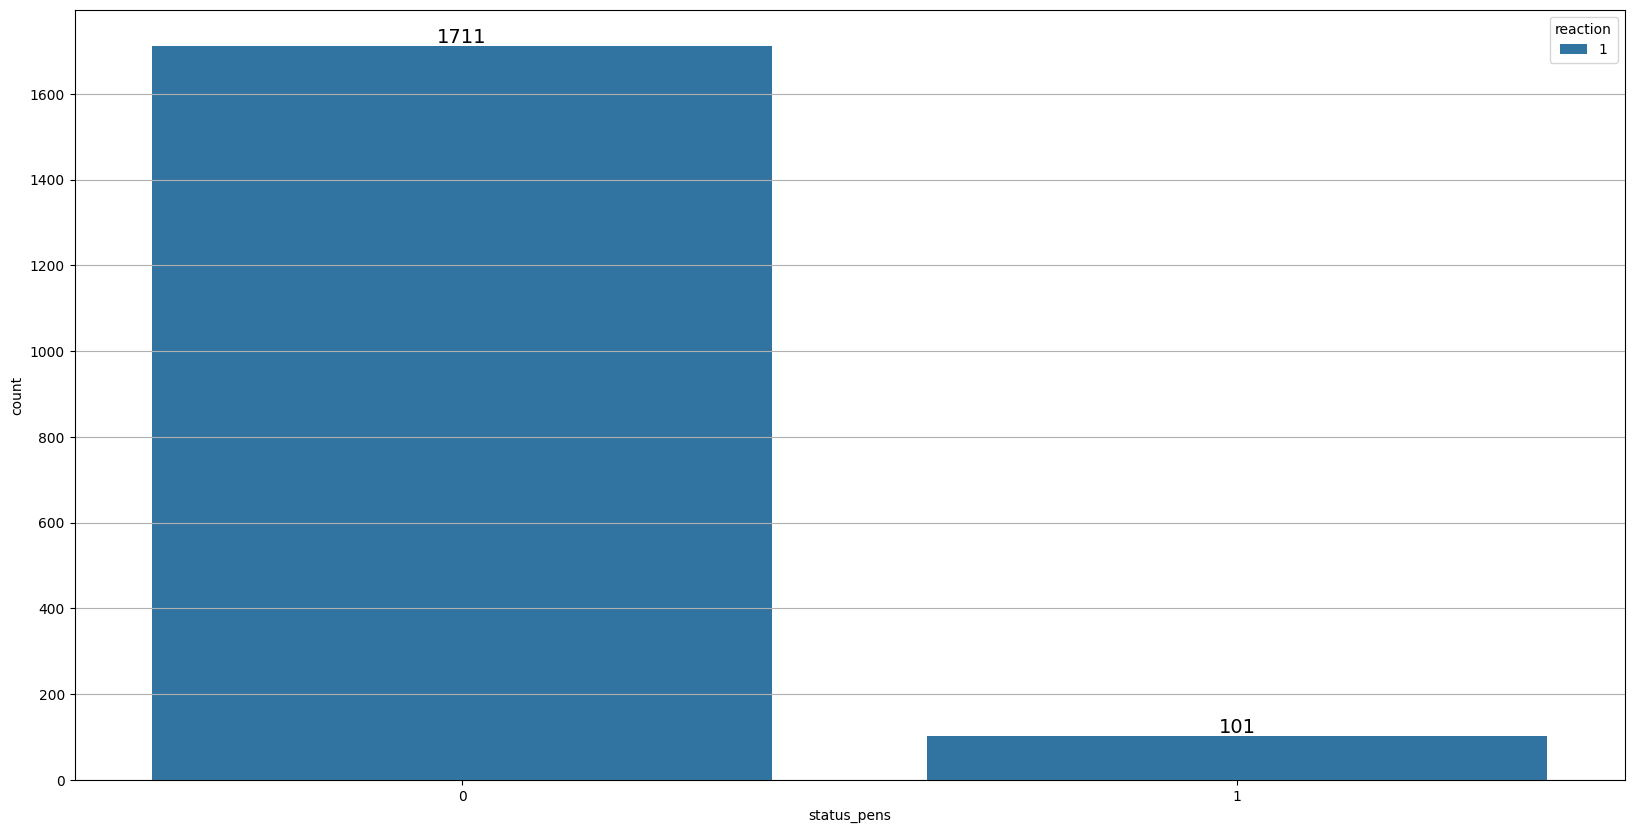

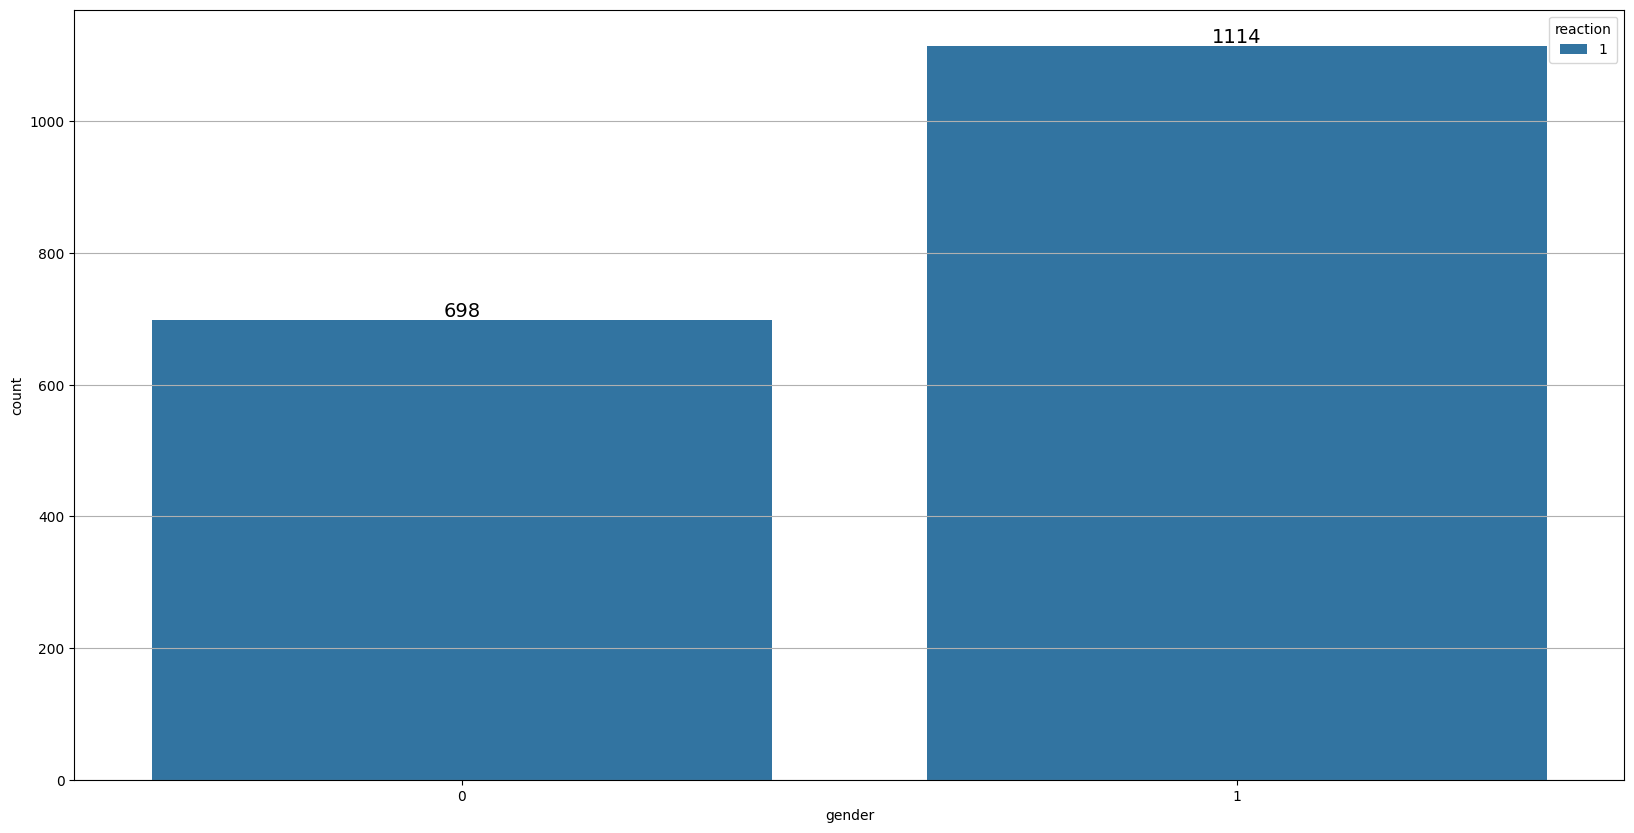

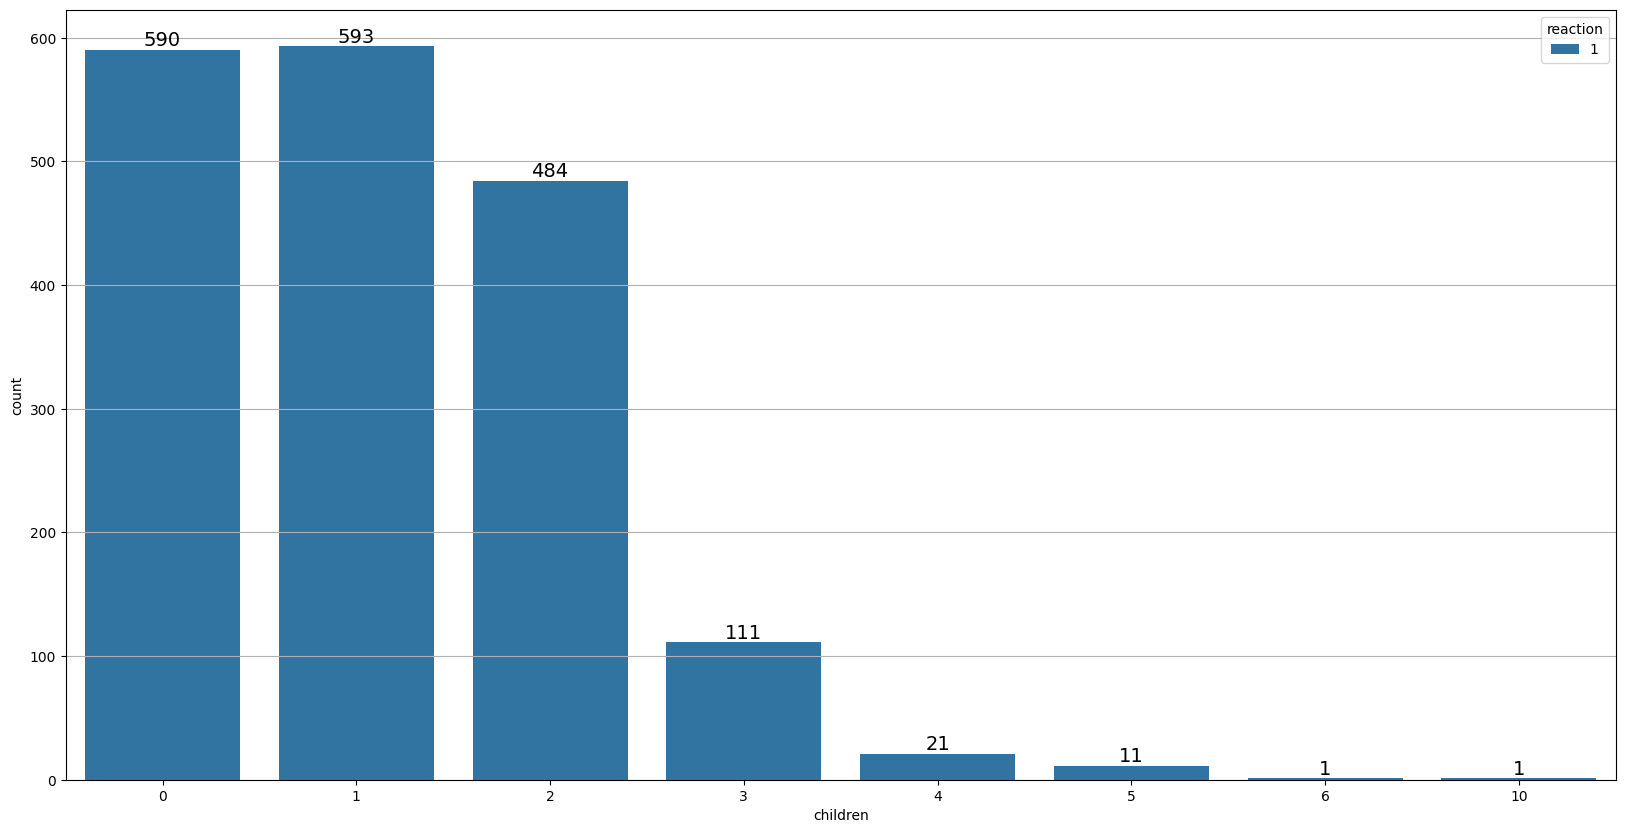

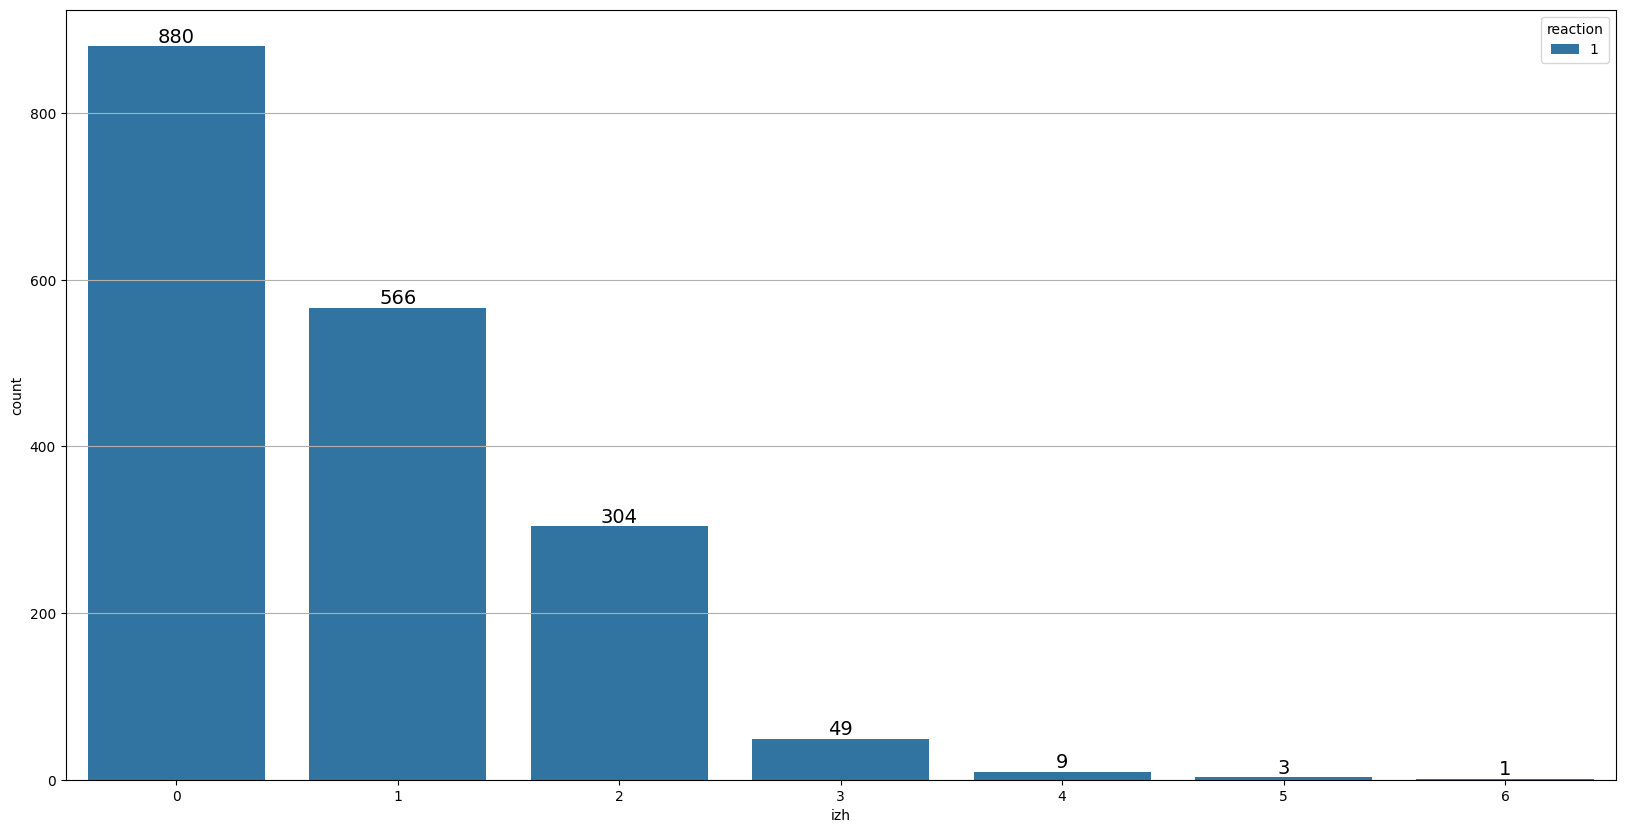

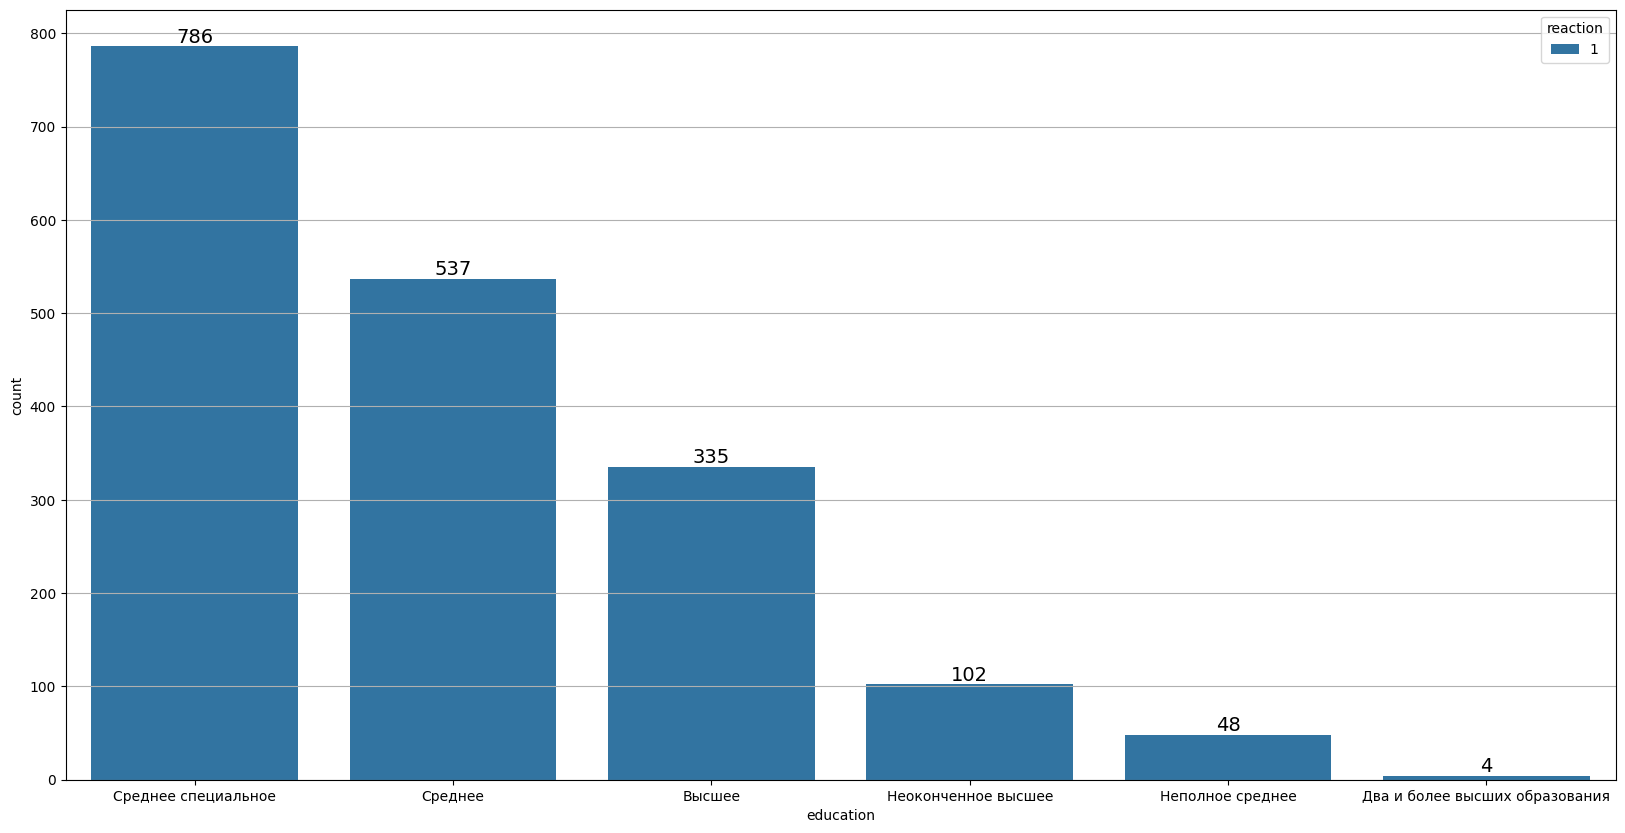

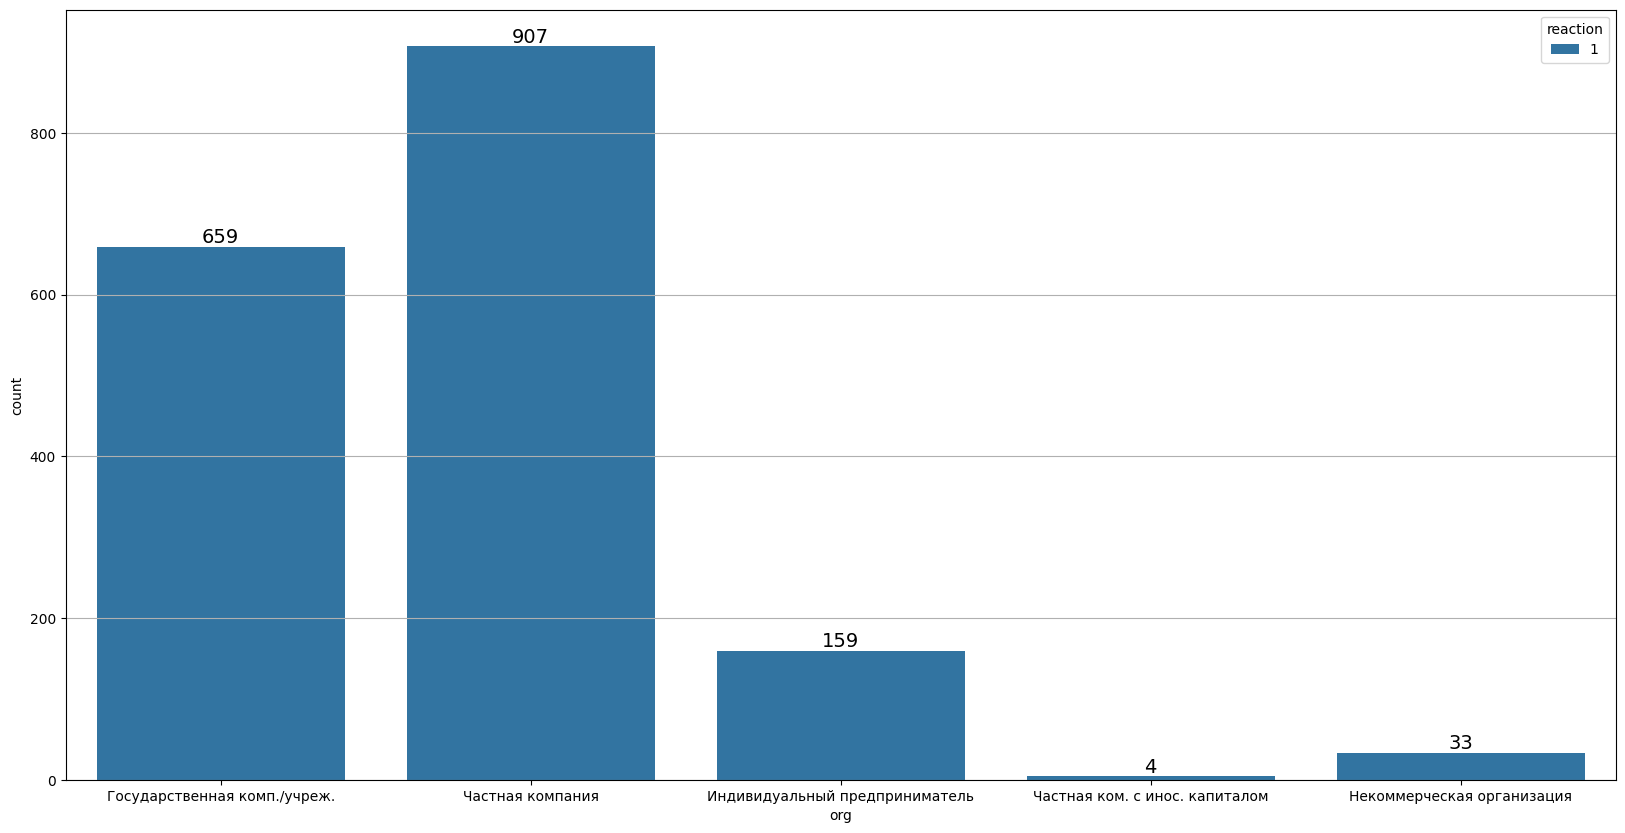

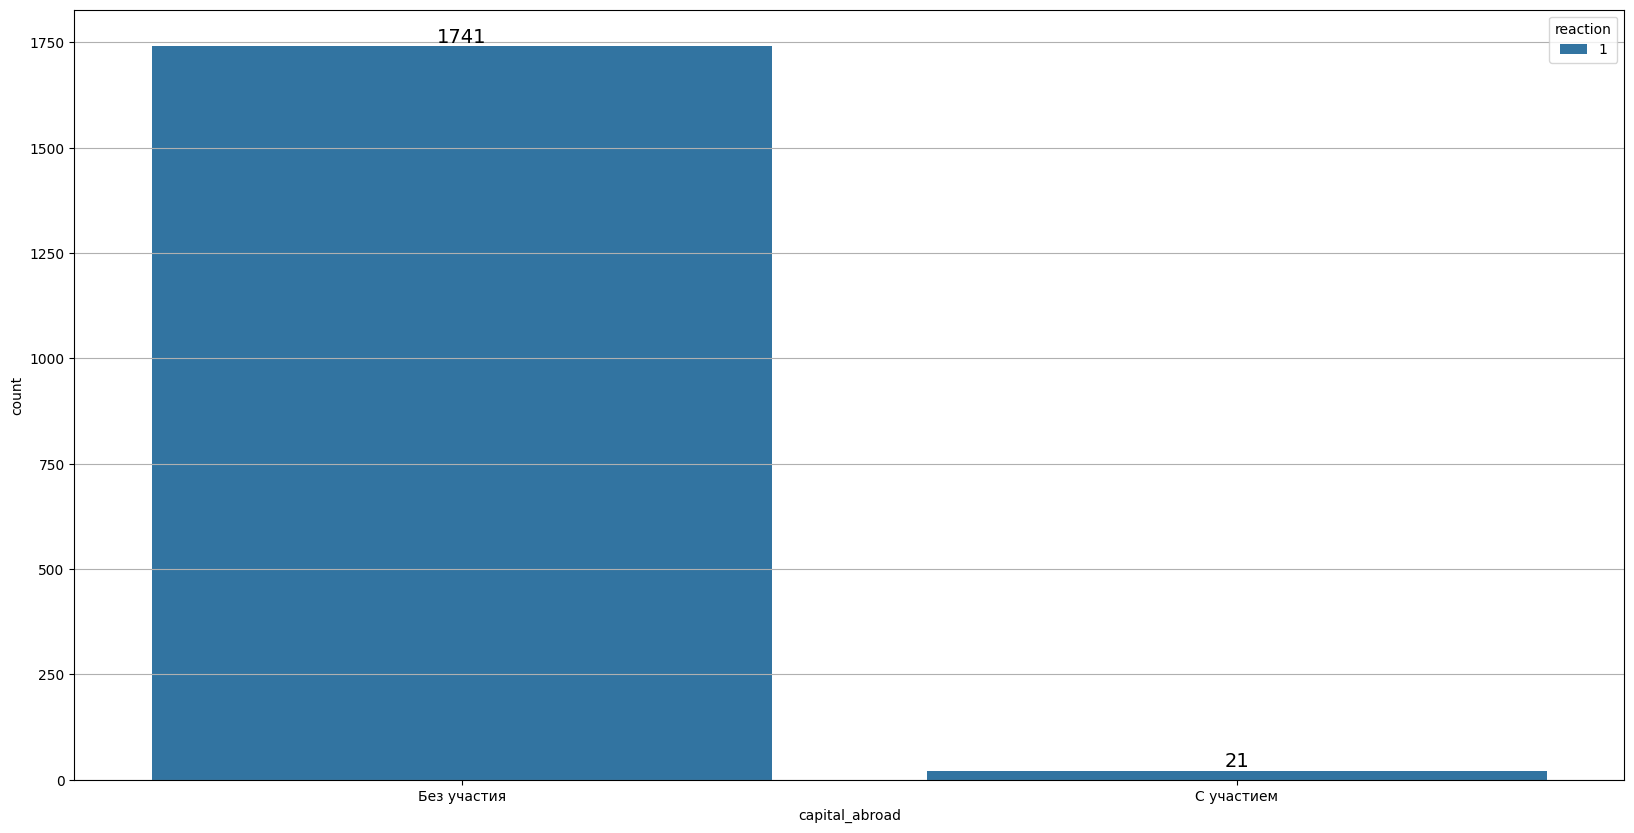

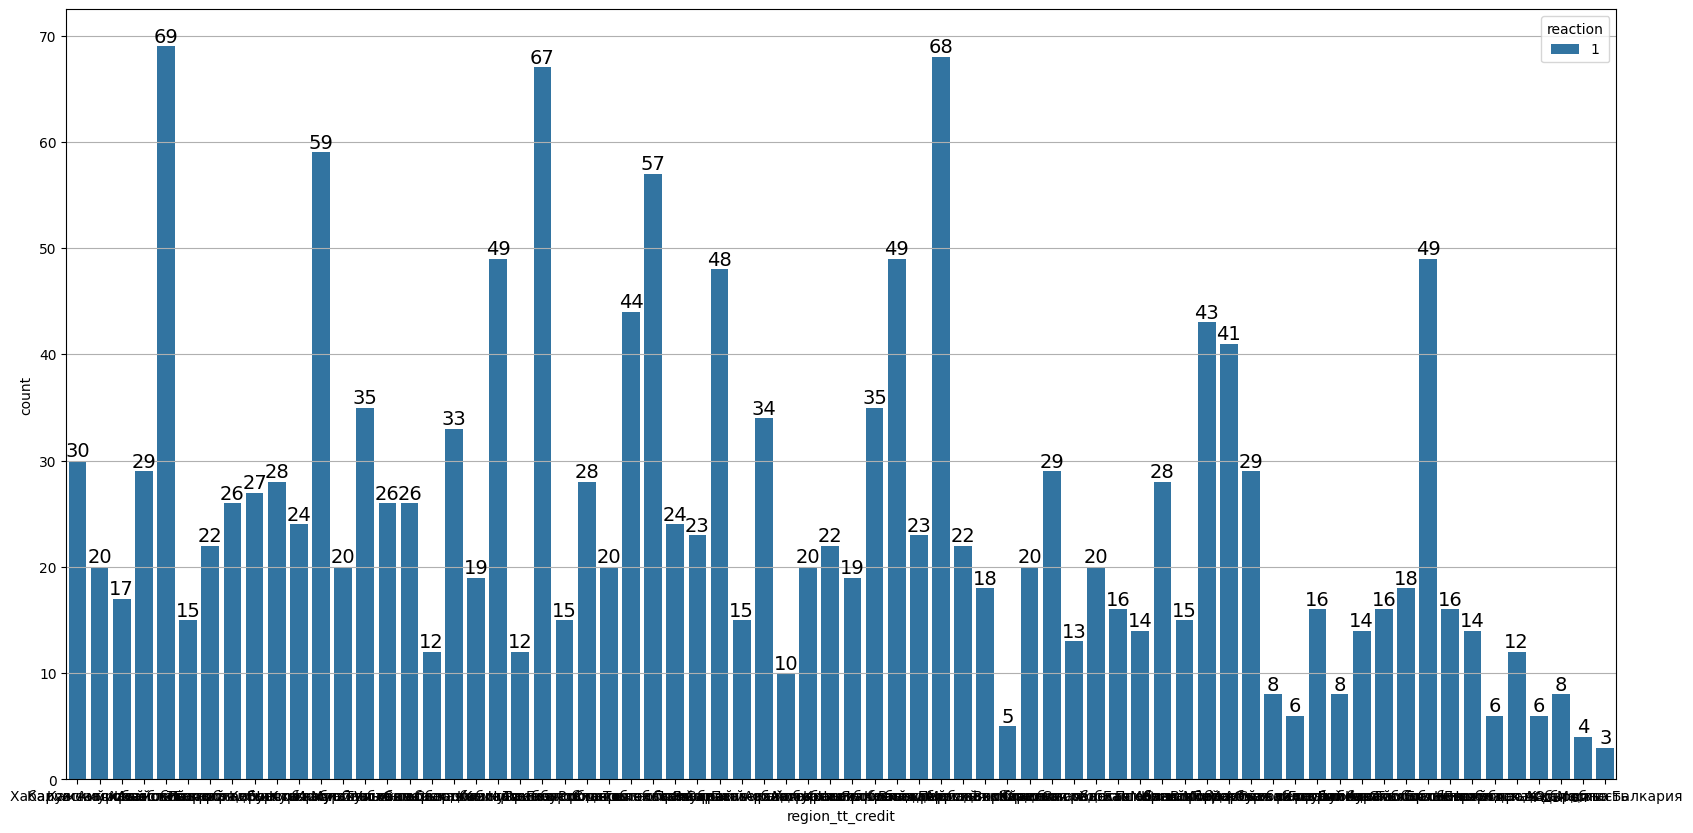

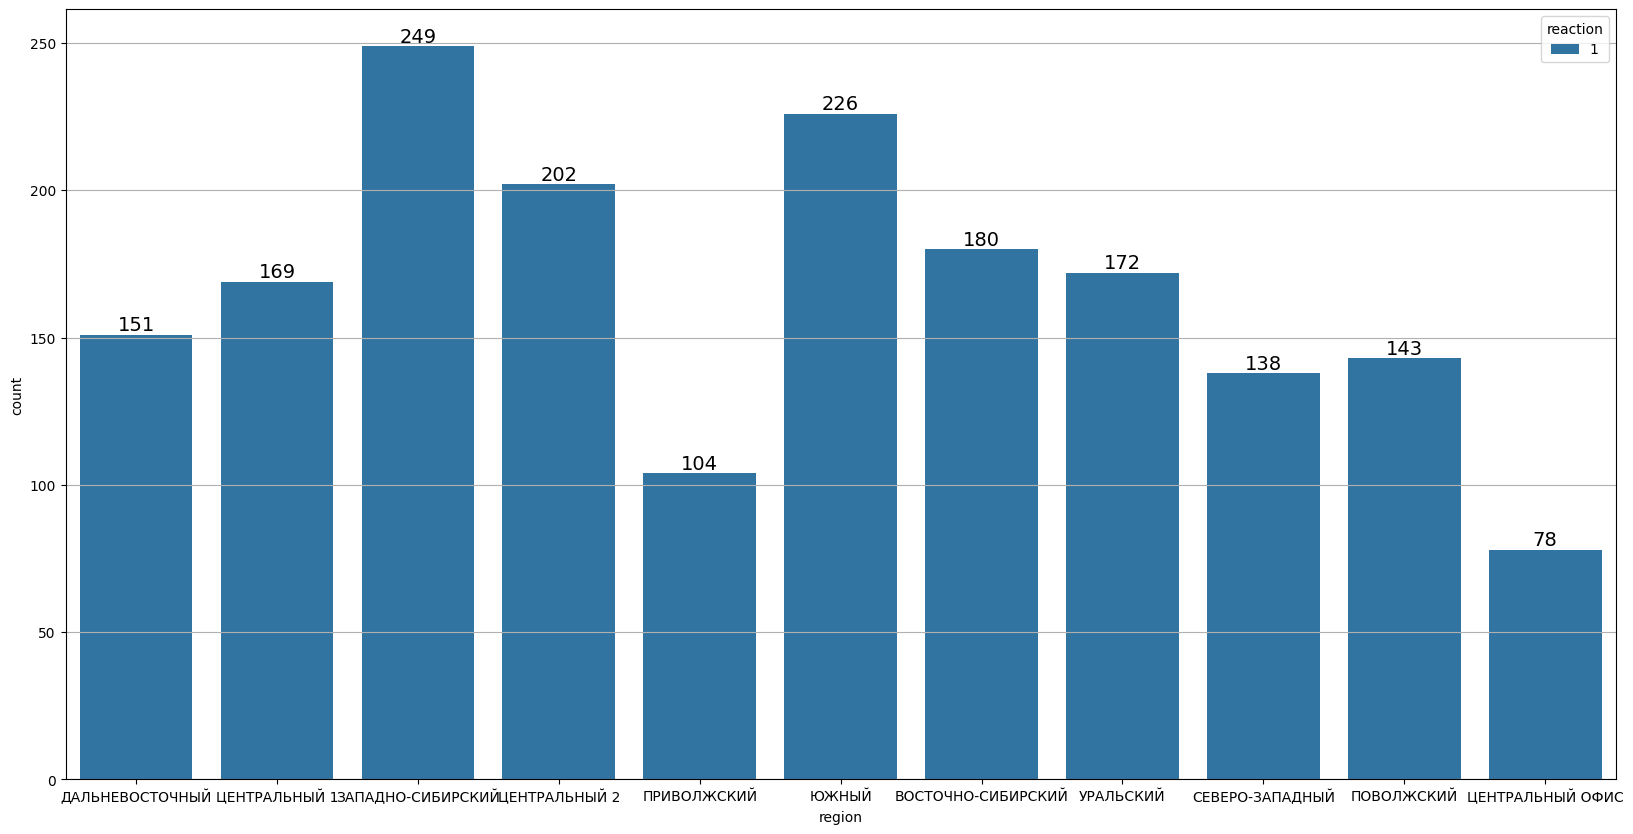

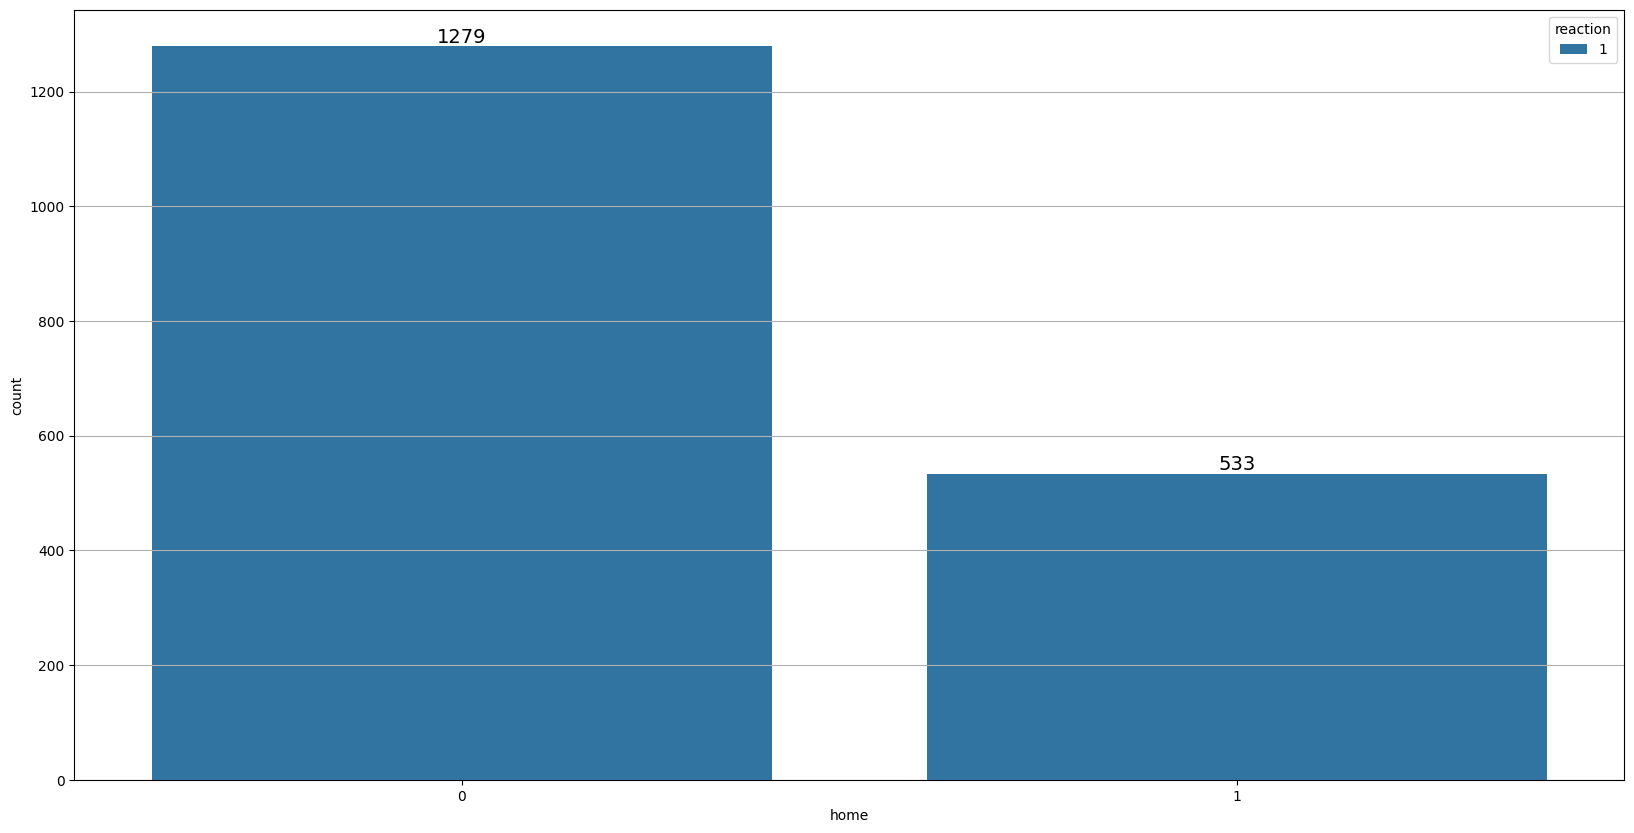

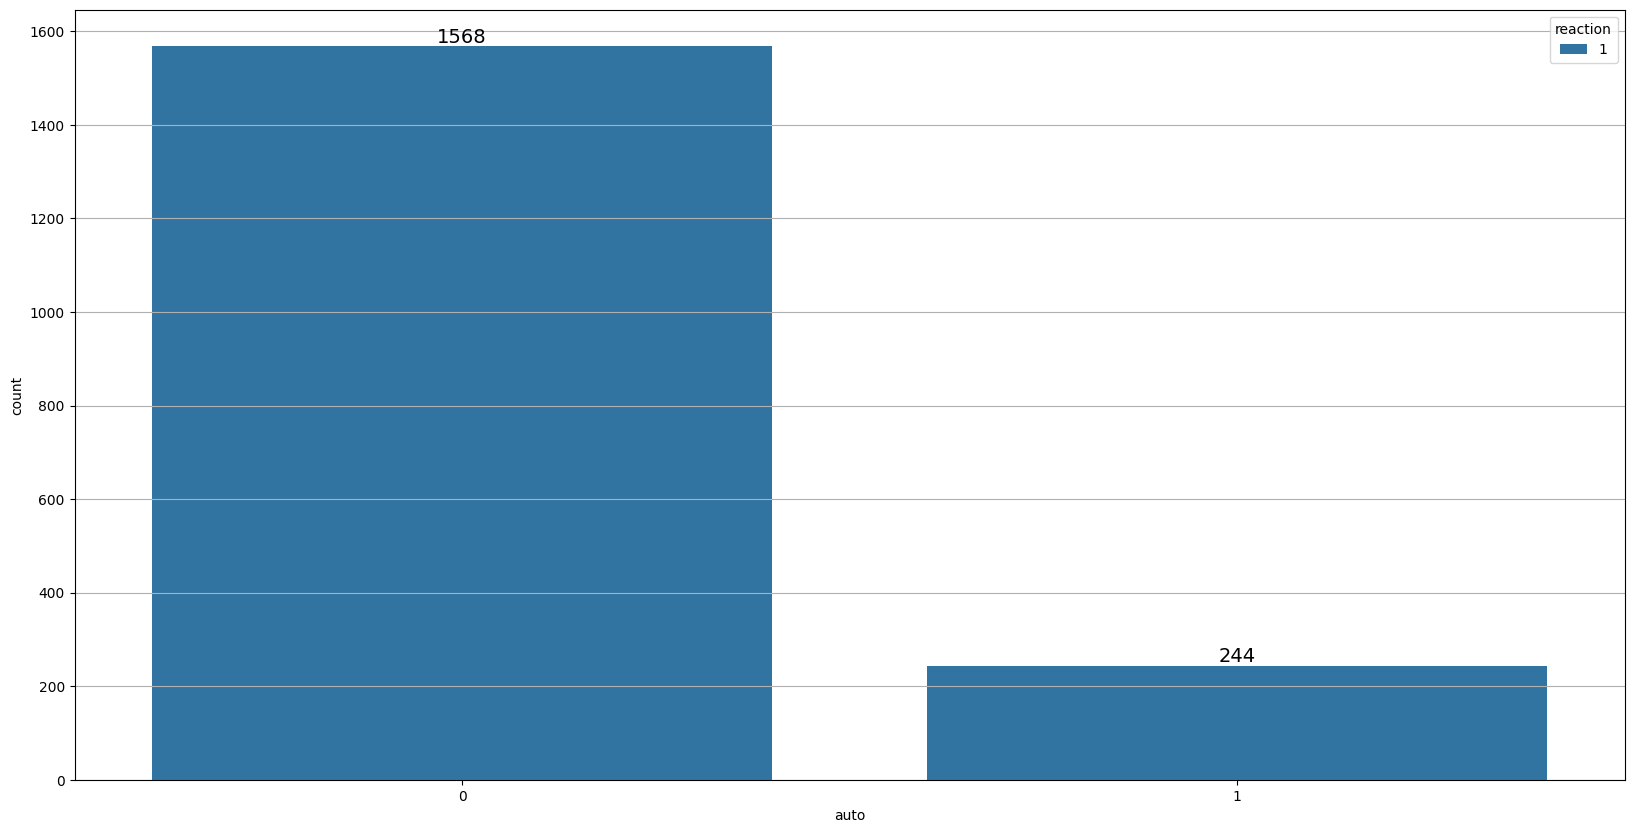

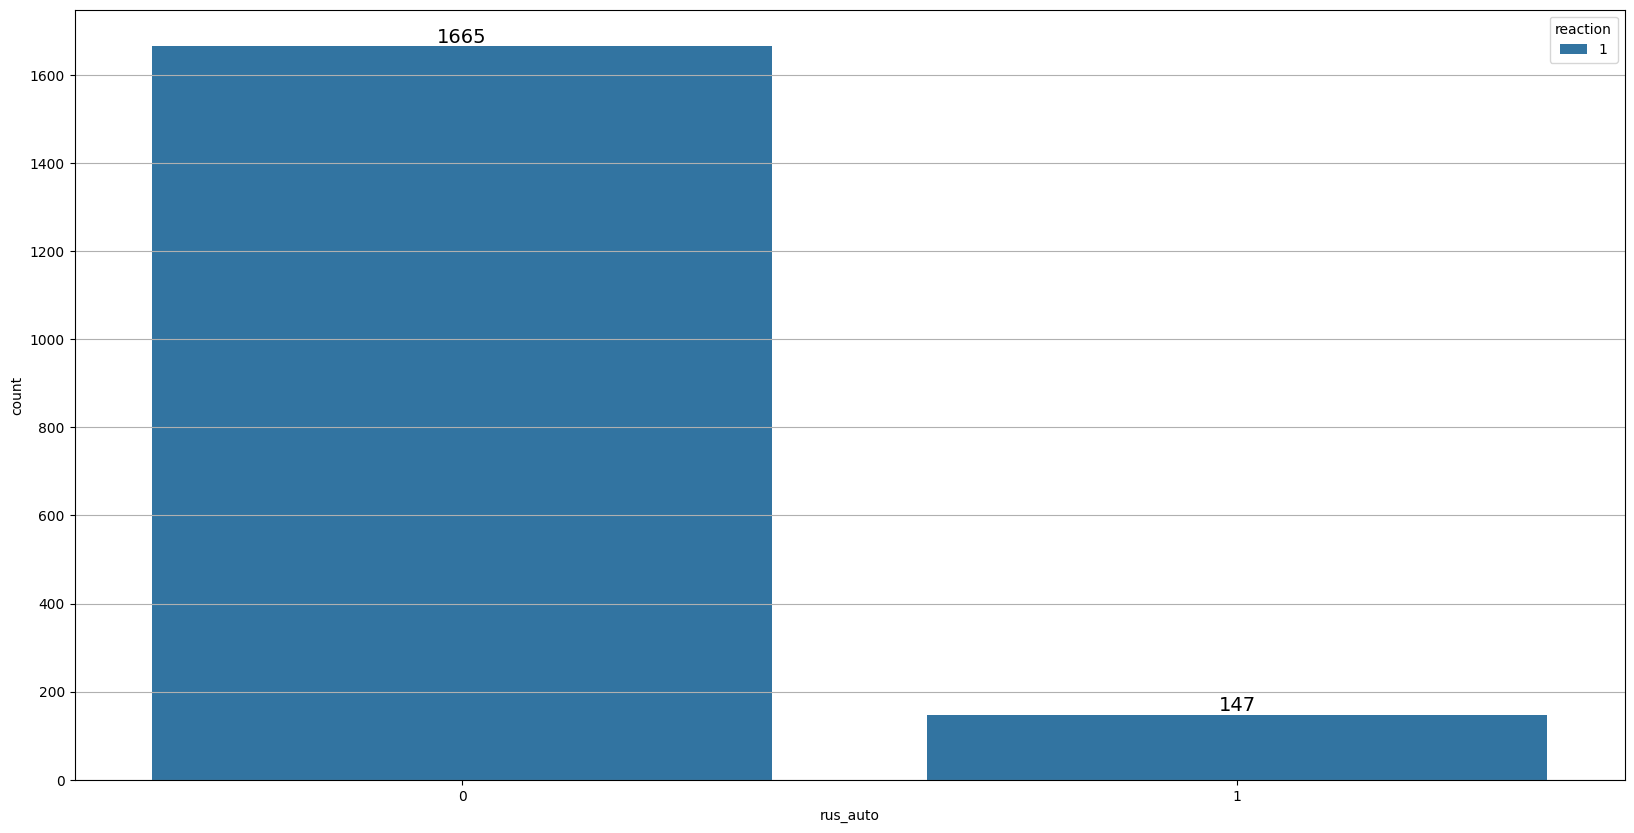

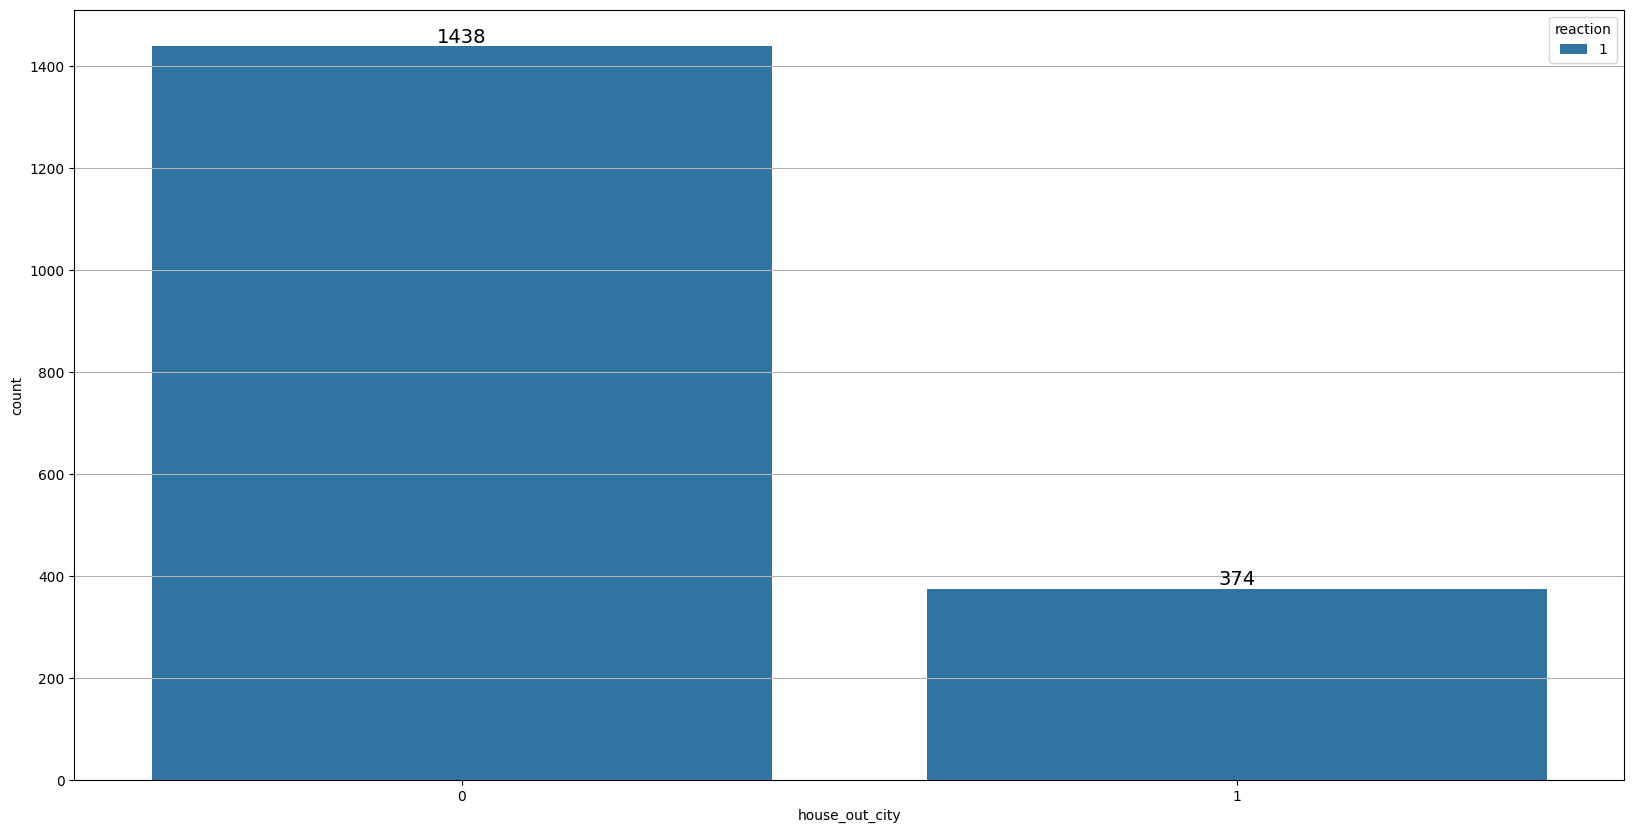

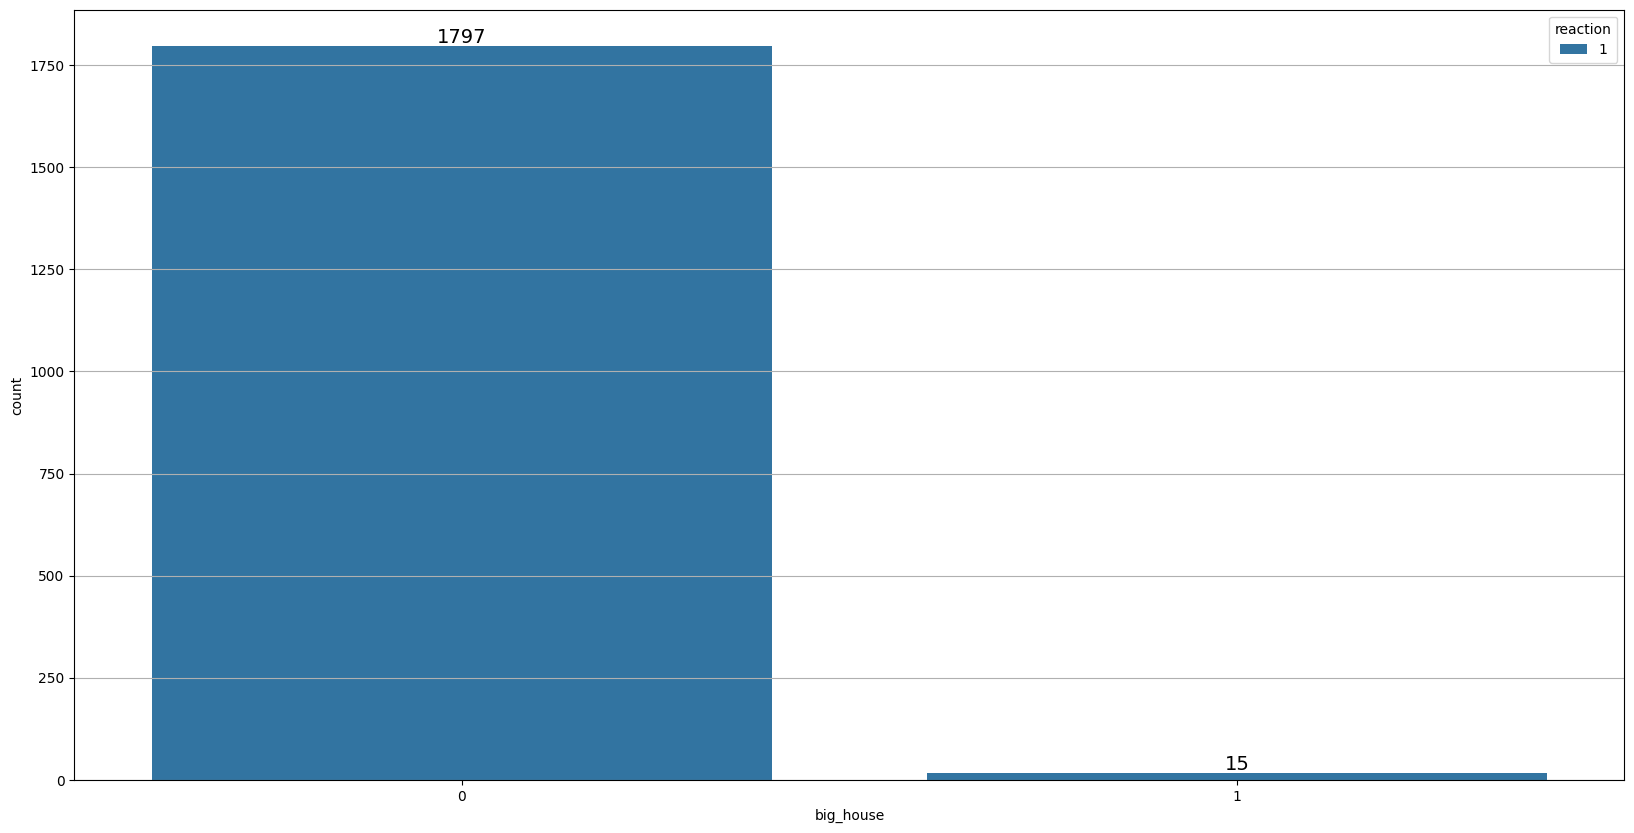

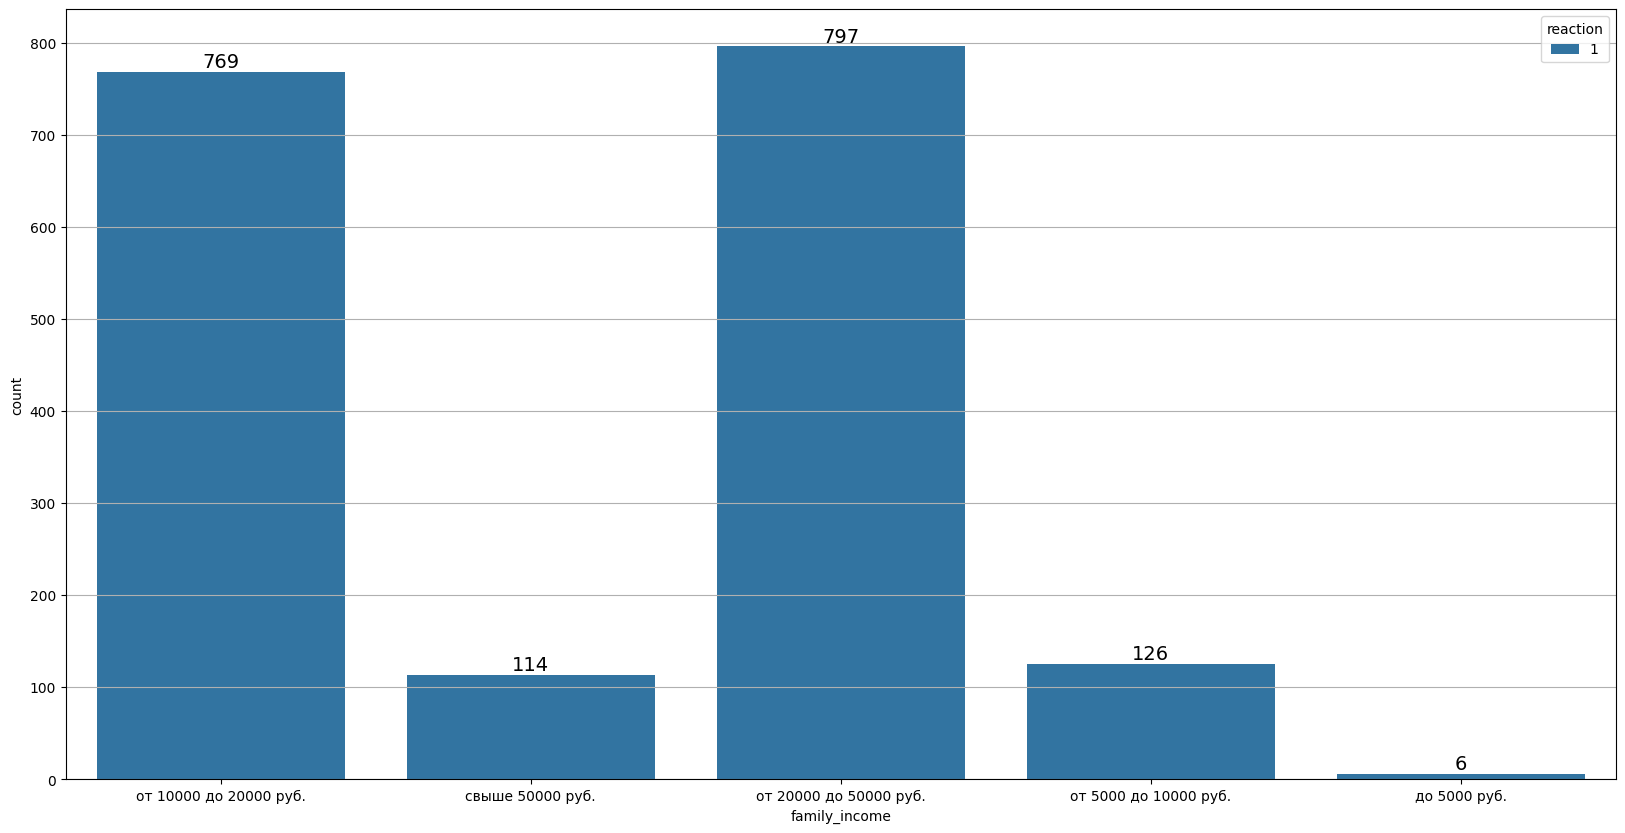

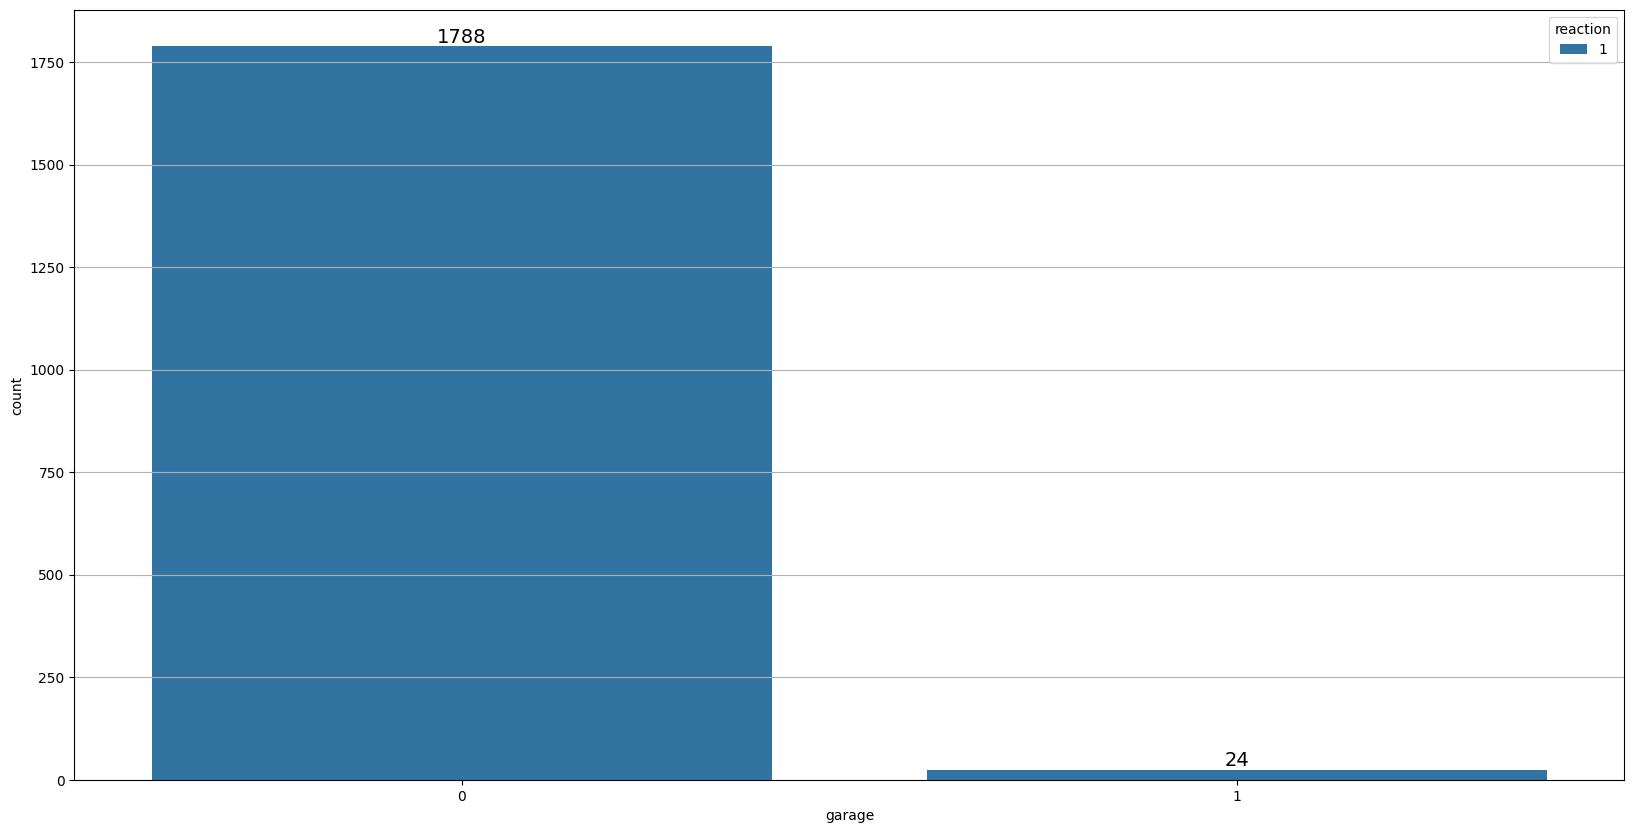

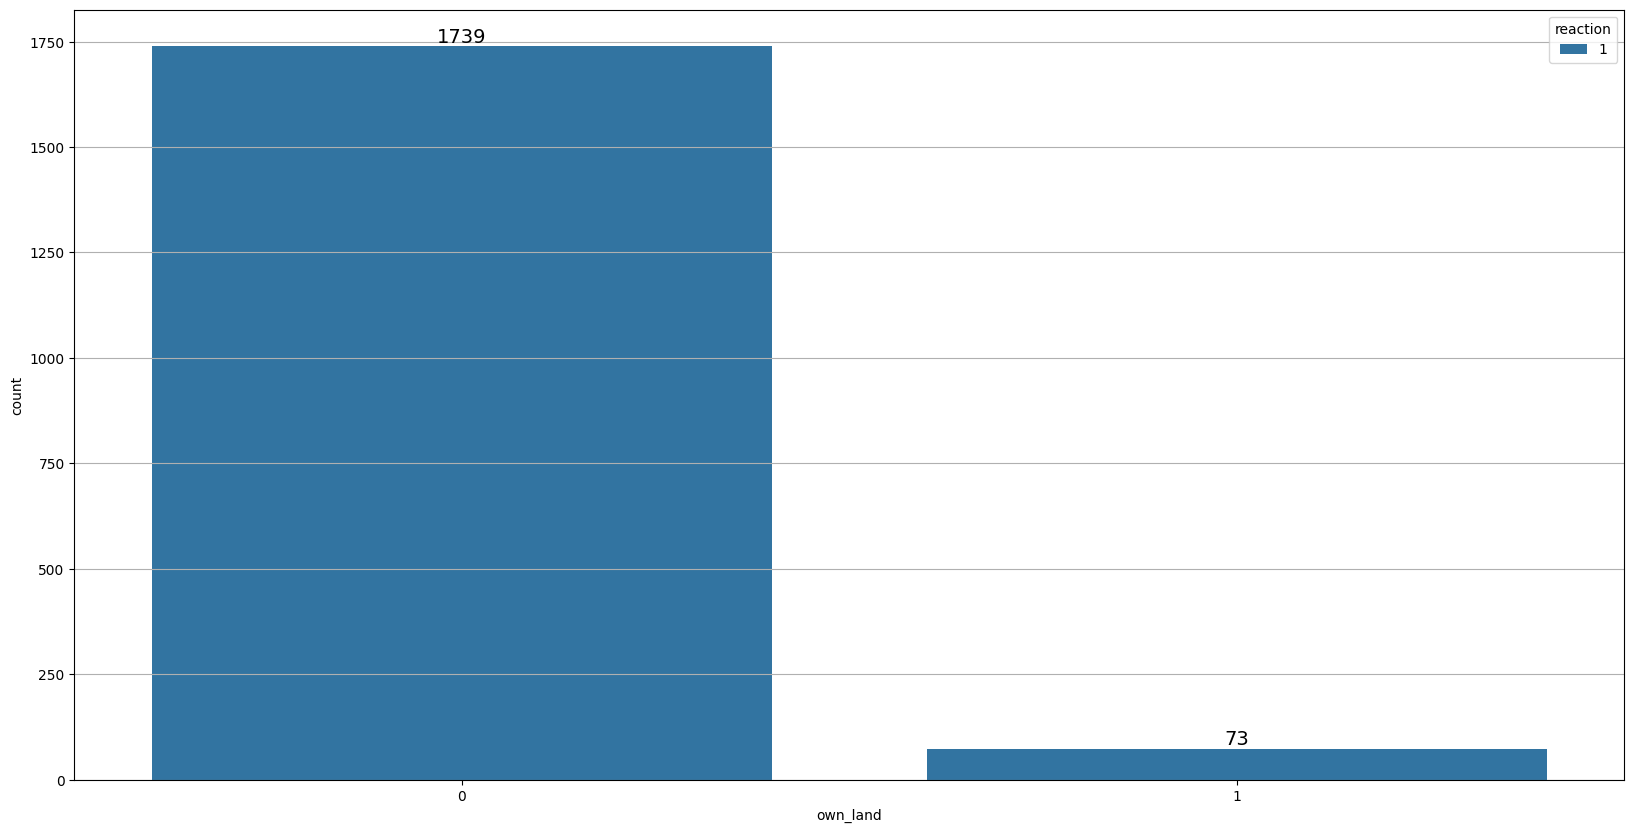

In [41]:
for col in lst_cat2:
    fig, ax = plt.subplots(figsize=(20,10))
    sns.countplot(x = data1[col], hue= 'reaction', data = data1)
    plt.grid(axis='y')
    for container in ax.containers:
        ax.bar_label(container, fontsize=14)
        


In [42]:
where_work_percent = (data1['where_work'].value_counts() / len(data1)) * 100
where_work_table = pd.DataFrame({'Количество': data1['where_work'].value_counts(), 'Процент': where_work_percent.values})

where_work_table

,Количество,Процент
where_work,,
Торговля,387,21.357616
Другие сферы,226,12.472406
Металлургия/Промышленность/Машиностроение,149,8.222958
Государственная служба,146,8.057395
Транспорт,123,6.788079
Здравоохранение,121,6.677704
Образование,111,6.125828
Сельское хозяйство,80,4.415011
Ресторанный бизнес/Общественное питание,76,4.194260


In [43]:
work_departament_percent = (data1['work_departament'].value_counts() / len(data1)) * 100
work_departament_table = pd.DataFrame({'Количество': data1['work_departament'].value_counts(), 'Процент': work_departament_percent.values})

work_departament_table

,Количество,Процент
work_departament,,
Участие в основ. деятельности,1448,79.911700
Вспомогательный техперсонал,138,7.615894
Не работает,50,2.759382
"Бухгалтерия, финансы, планир.",48,2.649007
Снабжение и сбыт,40,2.207506
Адм-хоз. и трансп. службы,36,1.986755
Служба безопасности,20,1.103753
Кадровая служба и секретариат,12,0.662252
Юридическая служба,9,0.496689


In [44]:
work_tittle_percent = (data1['work_tittle'].value_counts() / len(data1)) * 100
work_tittle_table = pd.DataFrame({'Количество': data1['work_tittle'].value_counts(), 'Процент': work_tittle_percent.values})

work_tittle_table

,Количество,Процент
work_tittle,,
Специалист,807,44.536424
Рабочий,442,24.392936
Служащий,121,6.677704
Работник сферы услуг,77,4.249448
Руководитель среднего звена,76,4.194260
Высококвалифиц. специалист,72,3.973510
Руководитель высшего звена,72,3.973510
Не работает,50,2.759382
Индивидуальный предприниматель,37,2.041943


In [45]:
region_tt_credit_percent = (data1['region_tt_credit'].value_counts() / len(data1)) * 100
region_tt_credit_table = pd.DataFrame({'Количество': data1['region_tt_credit'].value_counts(), 'Процент': region_tt_credit_percent.values})

region_tt_credit_table

,Количество,Процент
region_tt_credit,,
Алтайский край,69,3.807947
Краснодарский край,68,3.752759
Кемеровская область,67,3.697572
Читинская область,59,3.256071
Ставропольский край,57,3.145695
...,...,...
Марийская республика,6,0.331126
Еврейская АО,6,0.331126
Магаданская область,5,0.275938


Поскольку у откликнувшихся клиентов в большинстве своем нет недвижимости изучим живут ли они по прописки или нет.

In [47]:
fact_and_real_ad_percent = (data1['fact_and_real_ad'].value_counts() / len(data1)) * 100
fact_and_real_ad_table = pd.DataFrame({'Количество': data1['fact_and_real_ad'].value_counts(), 'Процент': fact_and_real_ad_percent.values})

fact_and_real_ad_table

,Количество,Процент
fact_and_real_ad,,
1,1768,97.571744
0,44,2.428256


Практически все живут по прописки, это означает, что скорее всего они живут в доме родителей, и можно предположить, что живут они с ними. Этот критерии тоже можно выделить при составлении портрета - человек живет не один, а со своей семьей.

In [49]:
data1[lst_ch].describe()

,pers_income,summa_credit,time_credit,how_living_in_fact,payment,time_not_pay,max_sum_not_pay
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,16173.378035,15925.888664,8.814570,116.105960,7.195916,0.291943,413.597174
std,10217.147092,13923.457568,4.456533,185.945124,7.171999,0.744782,1233.721504
min,3000.000000,2000.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,10000.000000,6874.500000,6.000000,36.000000,4.000000,0.000000,0.000000
50%,15000.000000,12175.000000,9.000000,84.000000,5.000000,0.000000,0.000000
75%,20000.000000,20447.025000,12.000000,168.000000,7.000000,0.000000,0.000000
max,150000.000000,116360.000000,36.000000,6336.000000,78.000000,7.000000,28012.200000


<Figure size 640x480 with 0 Axes>

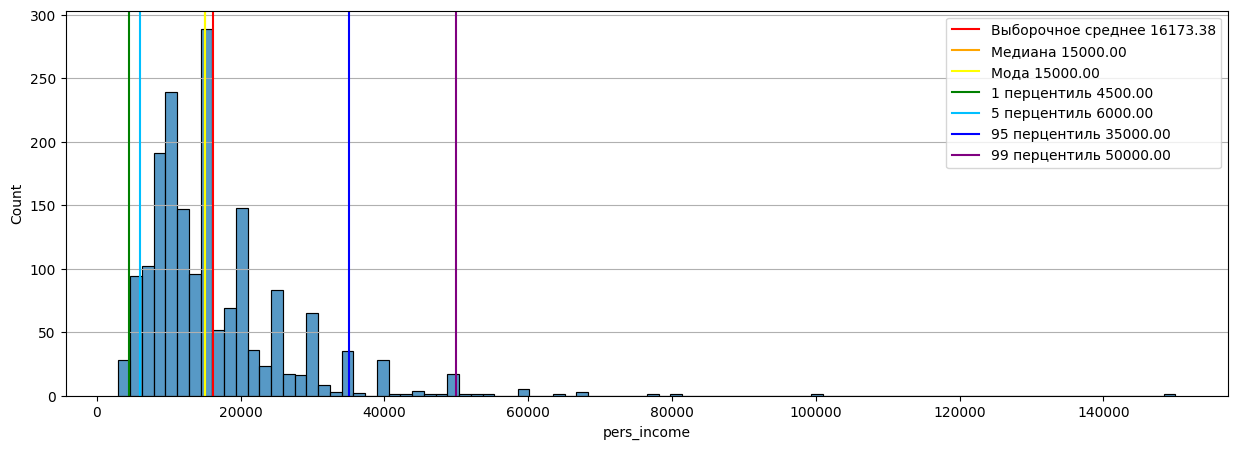

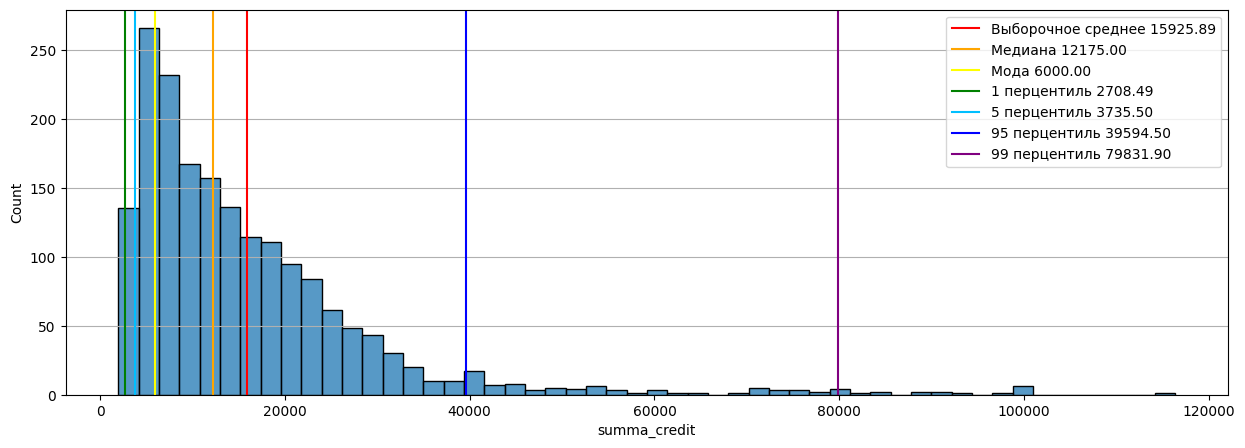

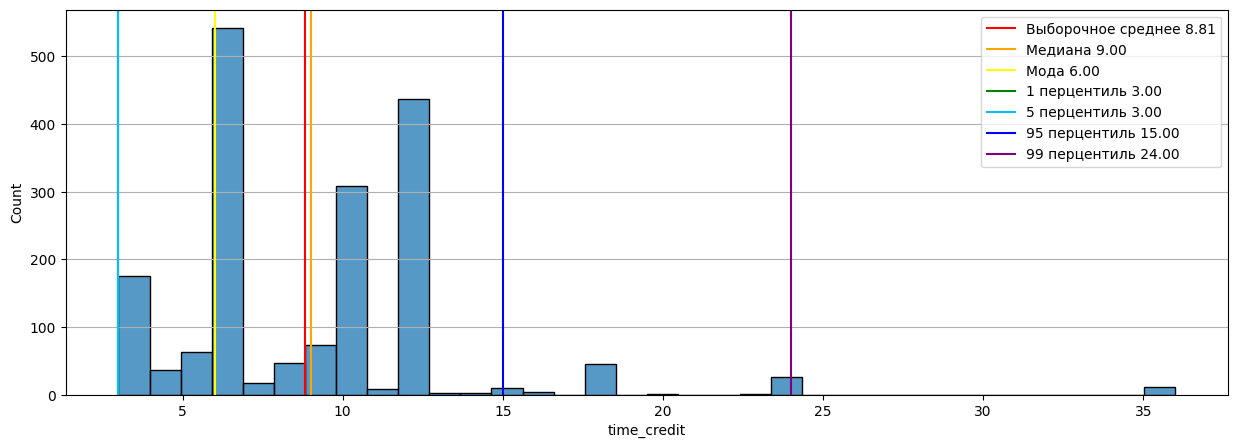

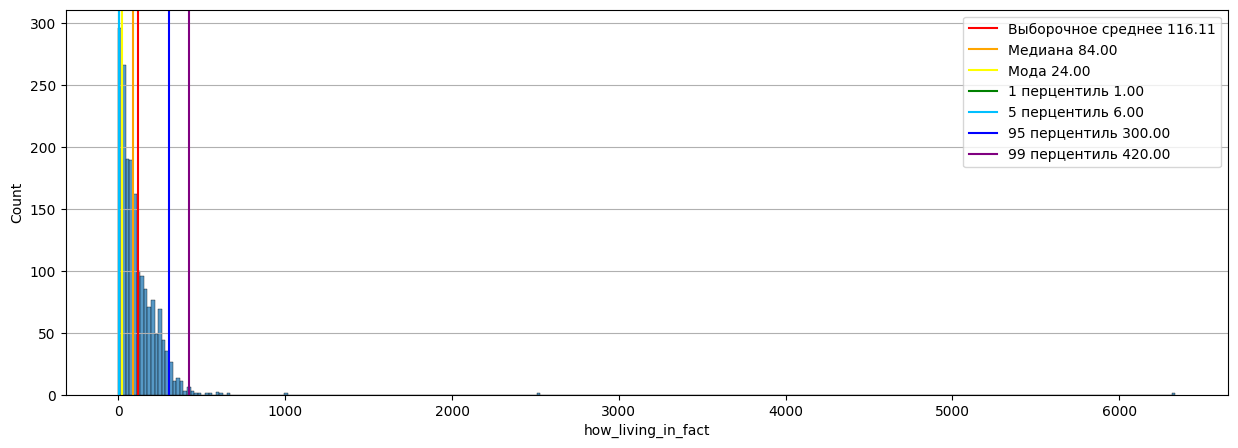

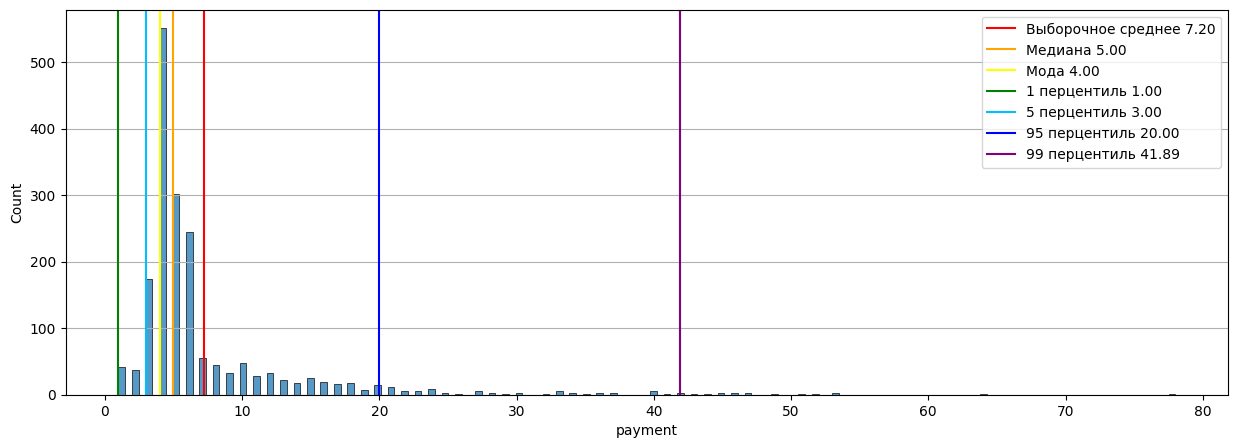

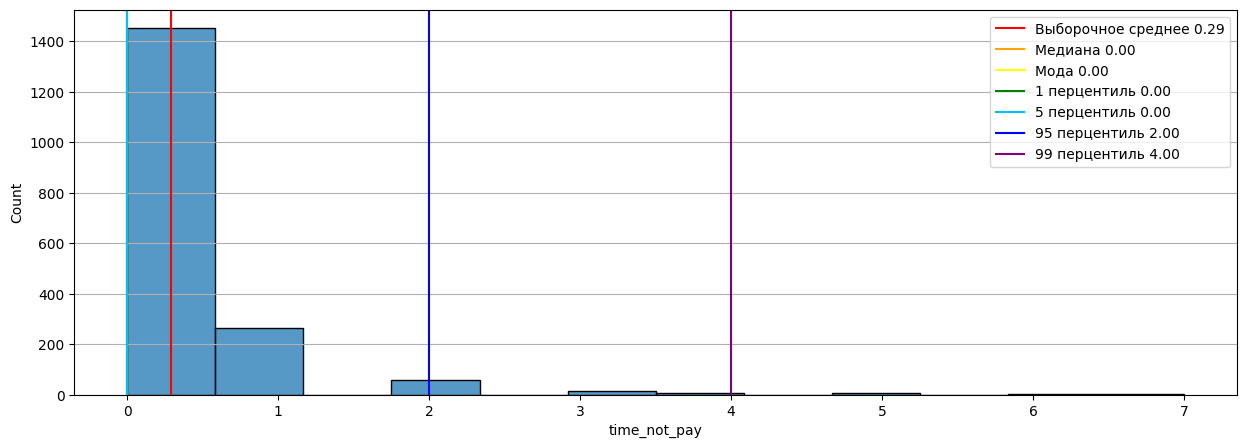

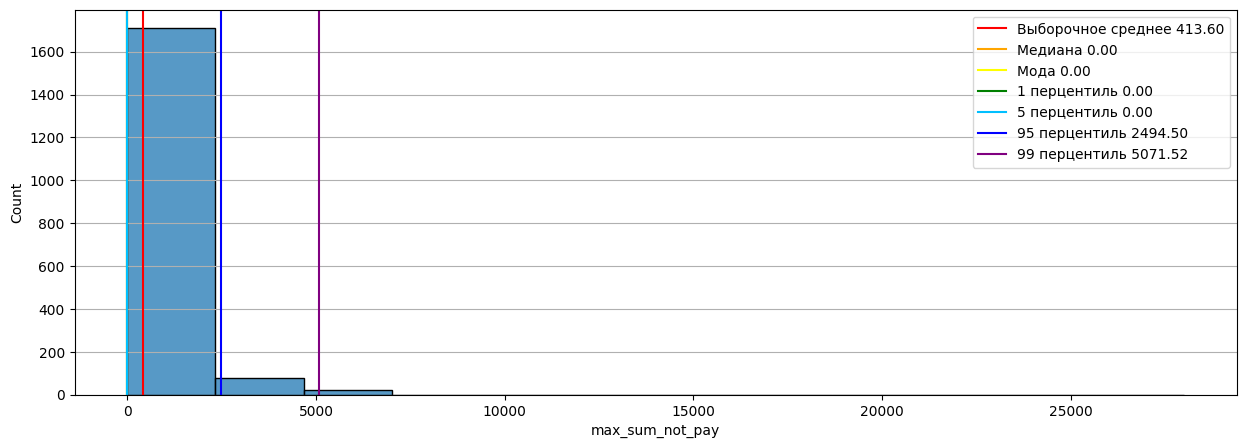

In [50]:
fig = plt.figure()
total_axes = len(lst_ch) # общее количество графиков (в данном случае
                             # берем равным количеству колонок в датафрейме
subplt = 1 # номер начального axes
for col in lst_ch:
    plt.subplots(figsize=(15,5))
    ax = sns.histplot(data1[col])

    ax.axvline(data1[col].mean(), color='red', label=f'Выборочное среднее {data1[col].mean():.2f}')
    ax.axvline(data1[col].median(), color='orange', label=f'Медиана {data1[col].median():.2f}')
    ax.axvline(data1[col].mode()[0], color='yellow', label=f'Мода {data1[col].mode()[0]:.2f}')

    q_1 = np.percentile(data1[col].dropna(), 1)
    ax.axvline(q_1, color='green', label=f'1 перцентиль {q_1:.2f}')
    q_5 = np.percentile(data1[col].dropna(), 5)
    ax.axvline(q_5, color='deepskyblue', label=f'5 перцентиль {q_5:.2f}')
    q_95 = np.percentile(data1[col].dropna(), 95)
    ax.axvline(q_95, color='blue', label=f'95 перцентиль {q_95:.2f}')
    q_99 = np.percentile(data1[col].dropna(), 99)
    ax.axvline(q_99, color='purple', label=f'99 перцентиль {q_99:.2f}')

    plt.grid(axis='y')

    plt.legend()
   

Мужчин откликнулось больше, но женщины также откликались, поэтому для составление портрета рассмотрим признаки относительно пола откликнувшихся.

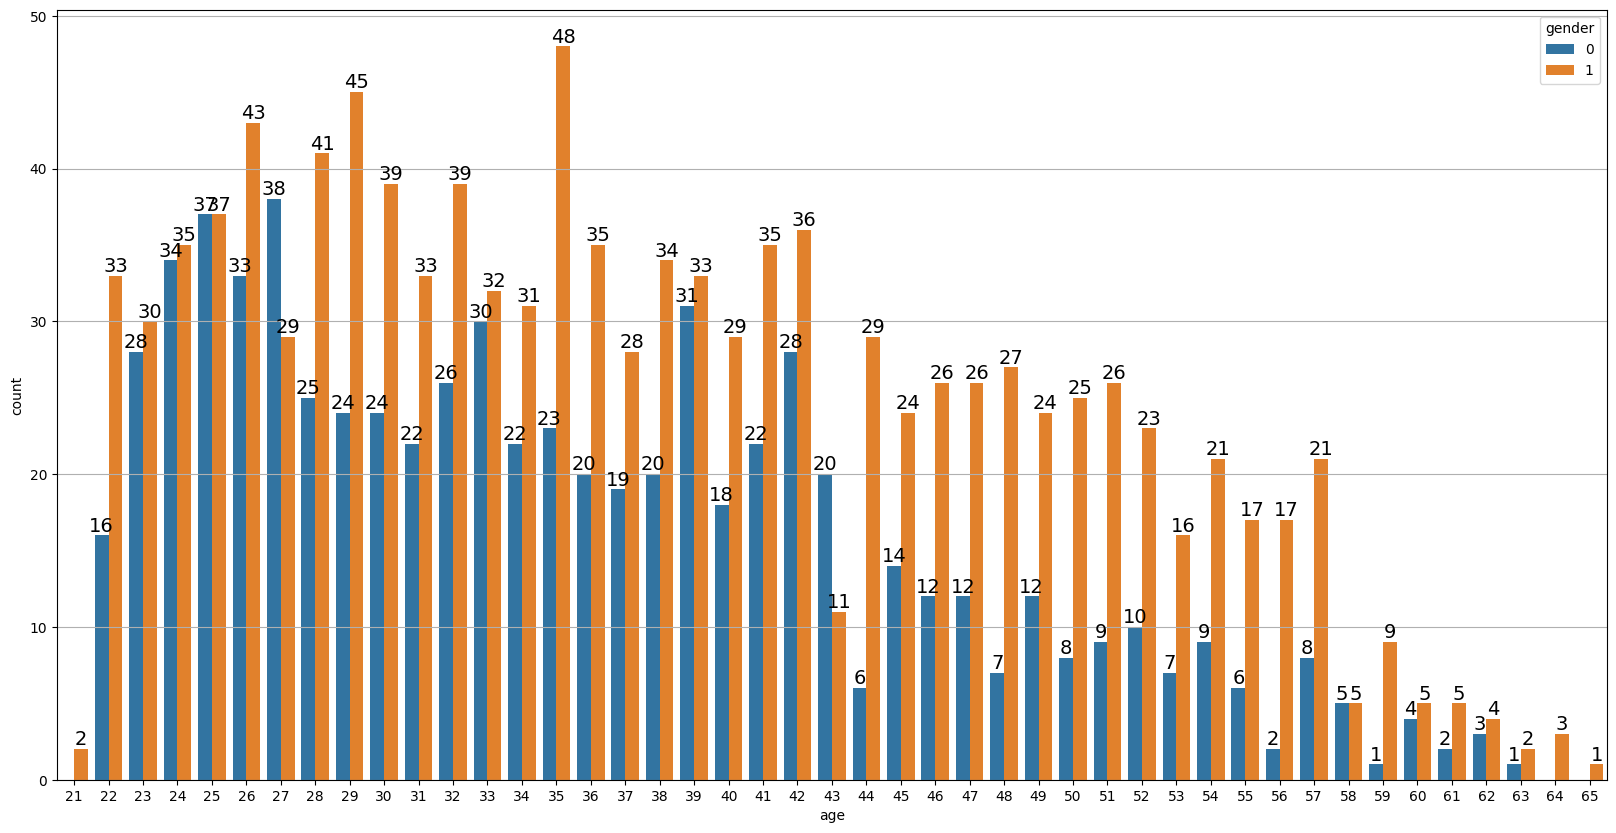

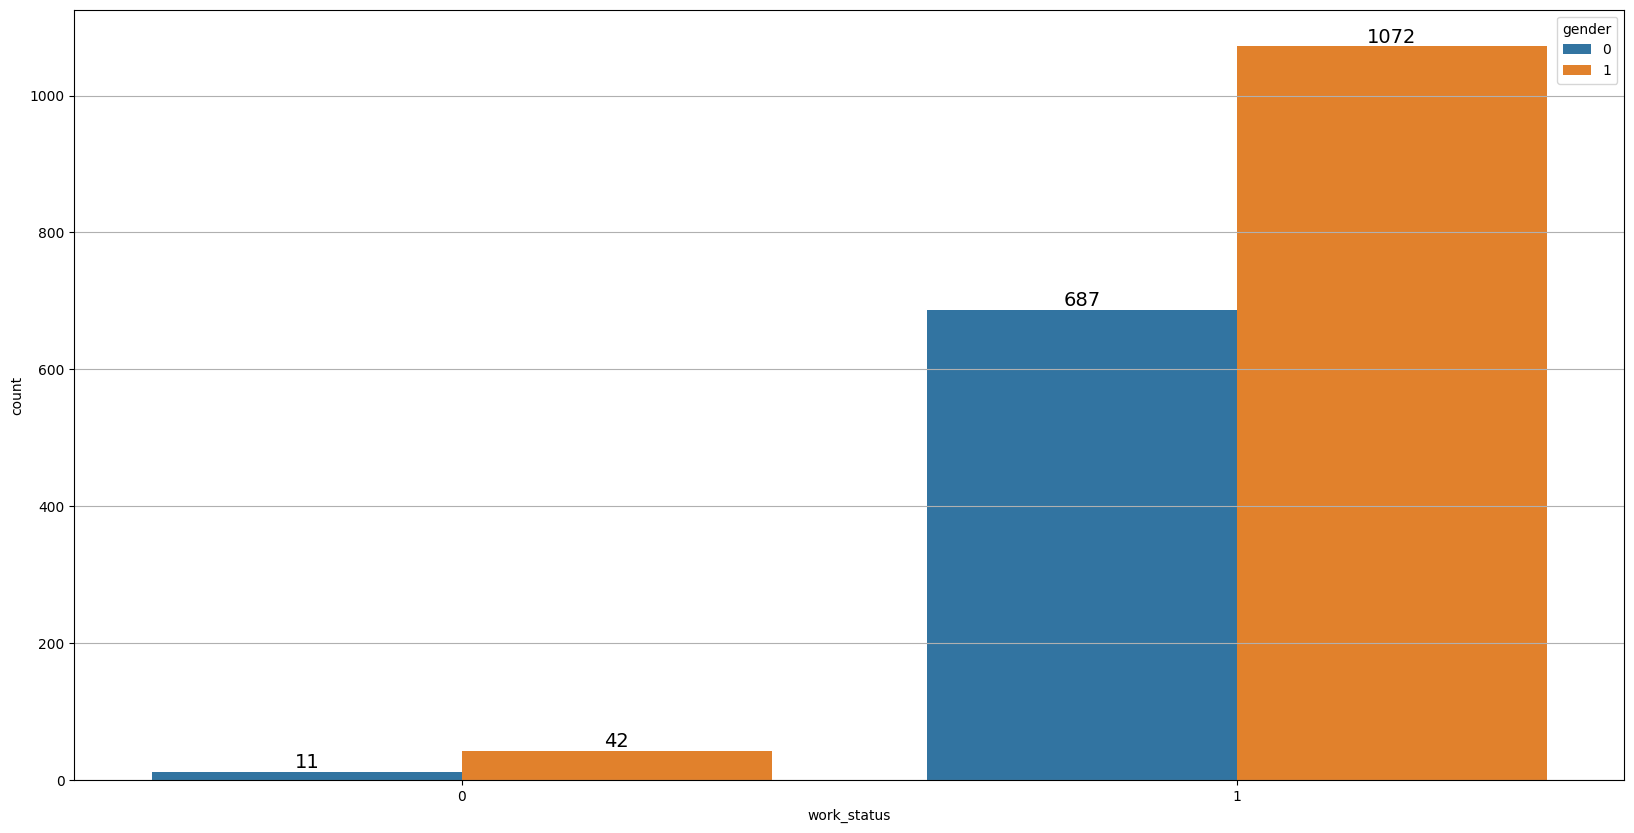

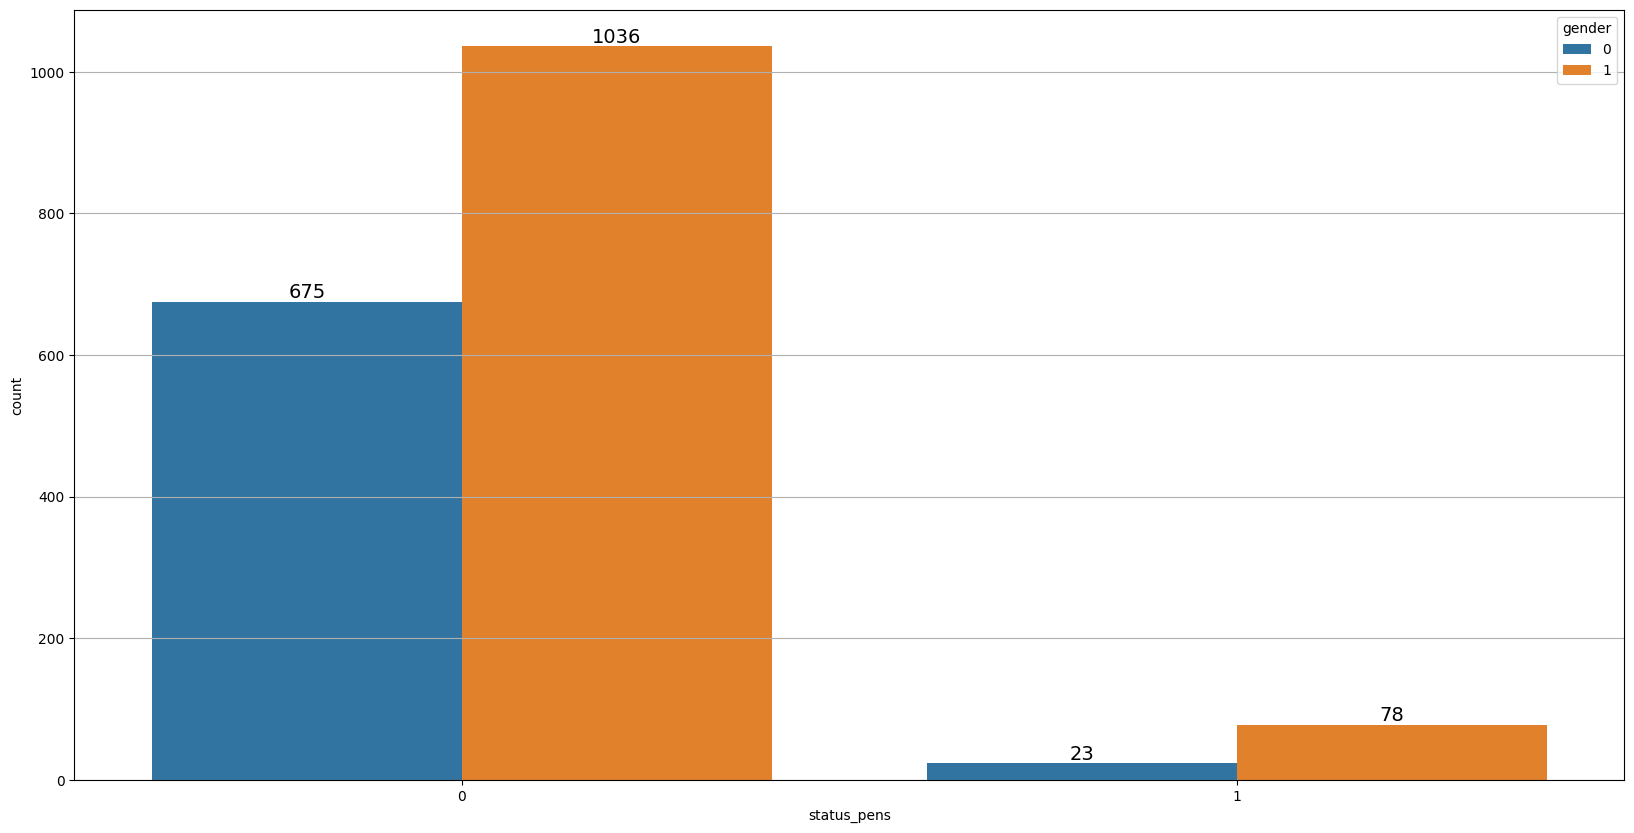

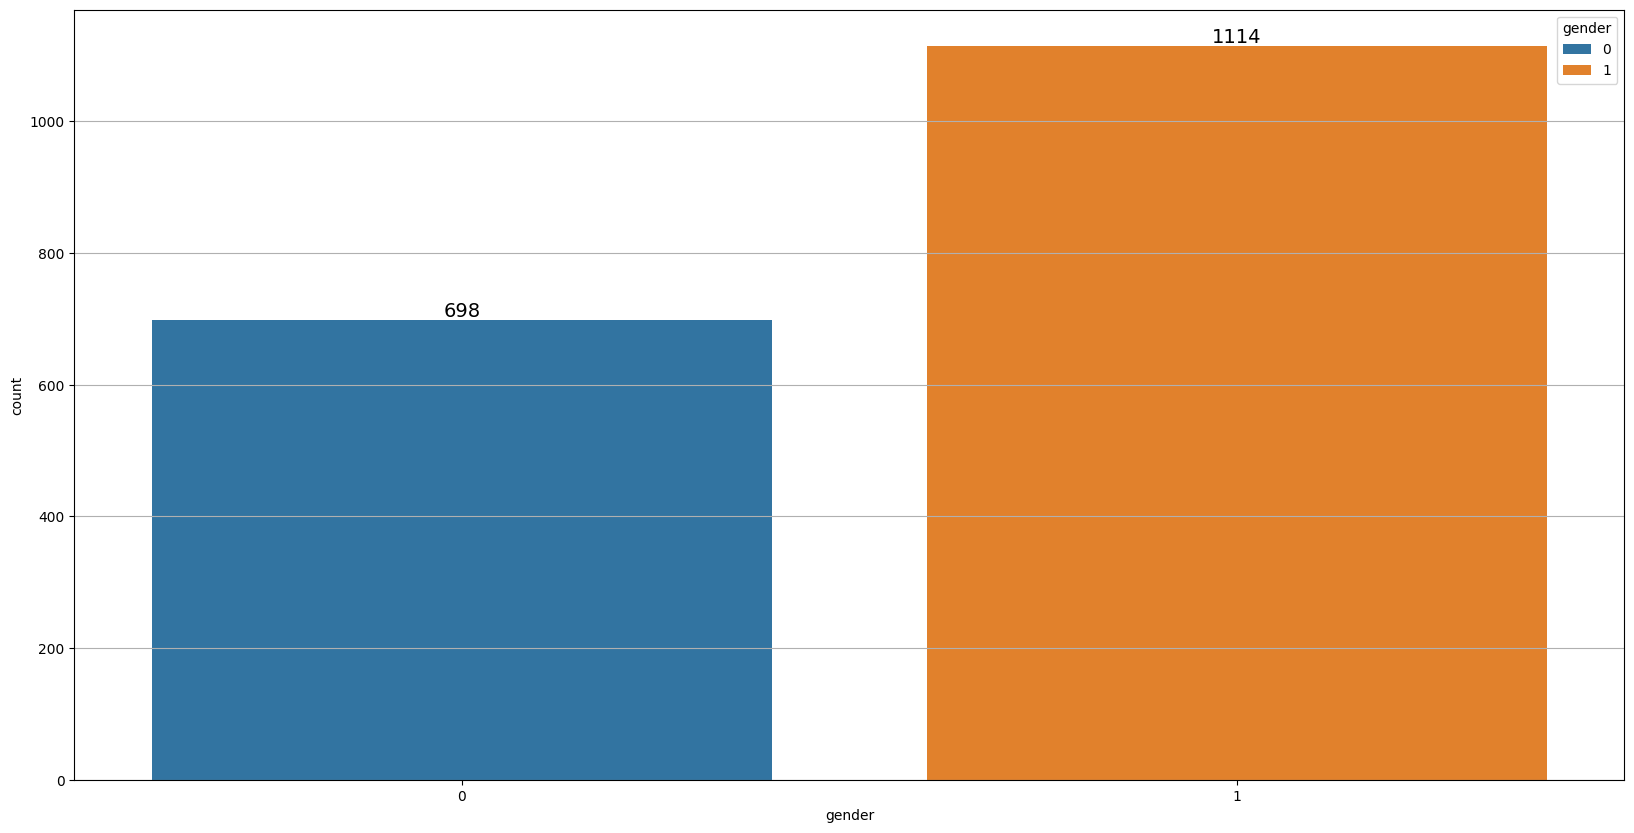

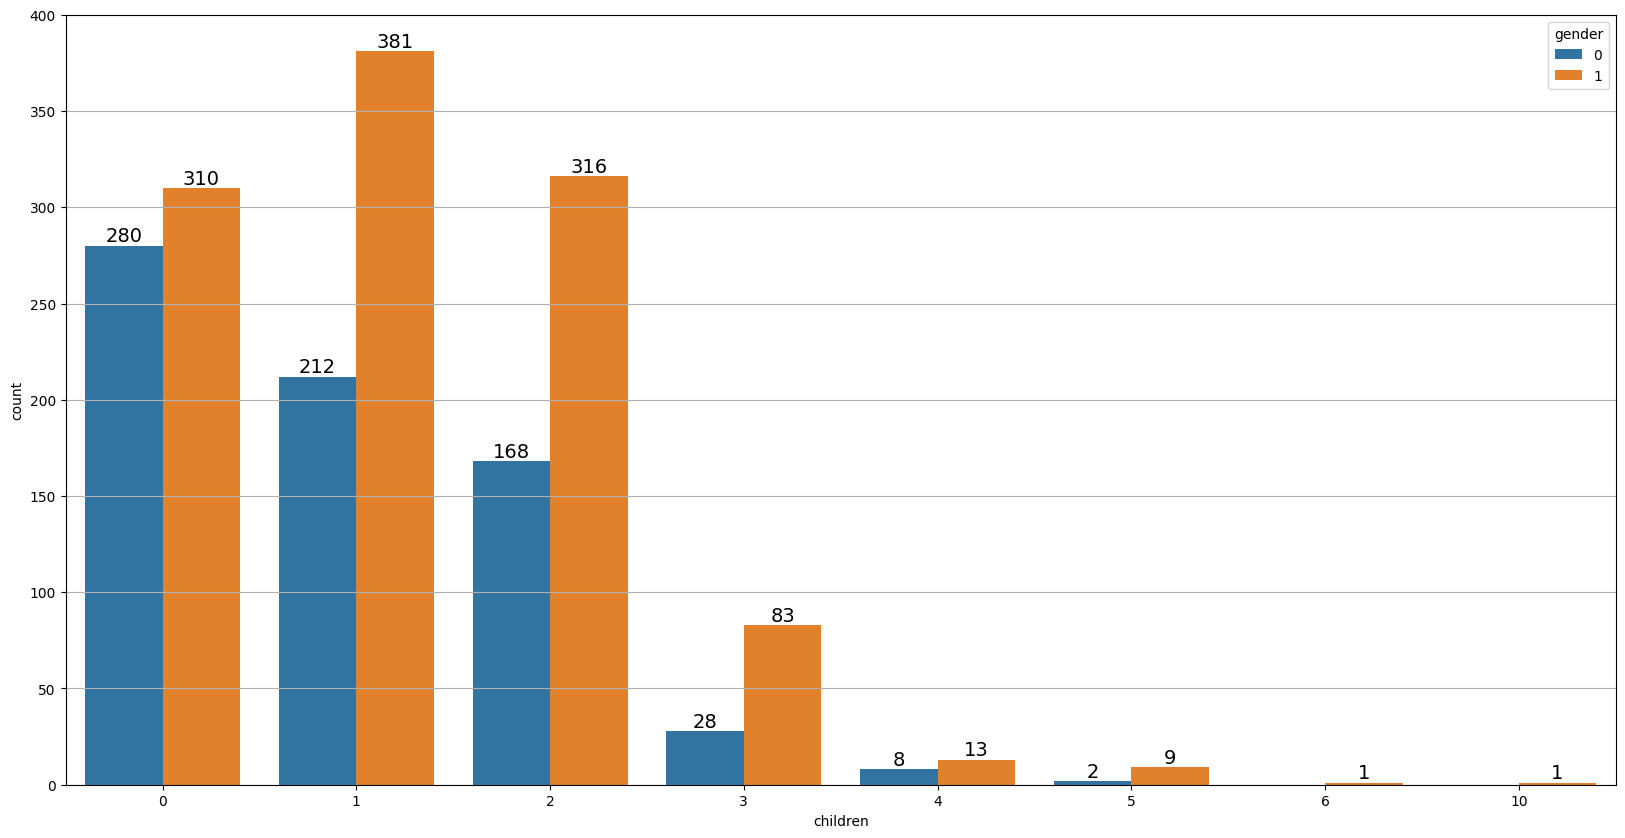

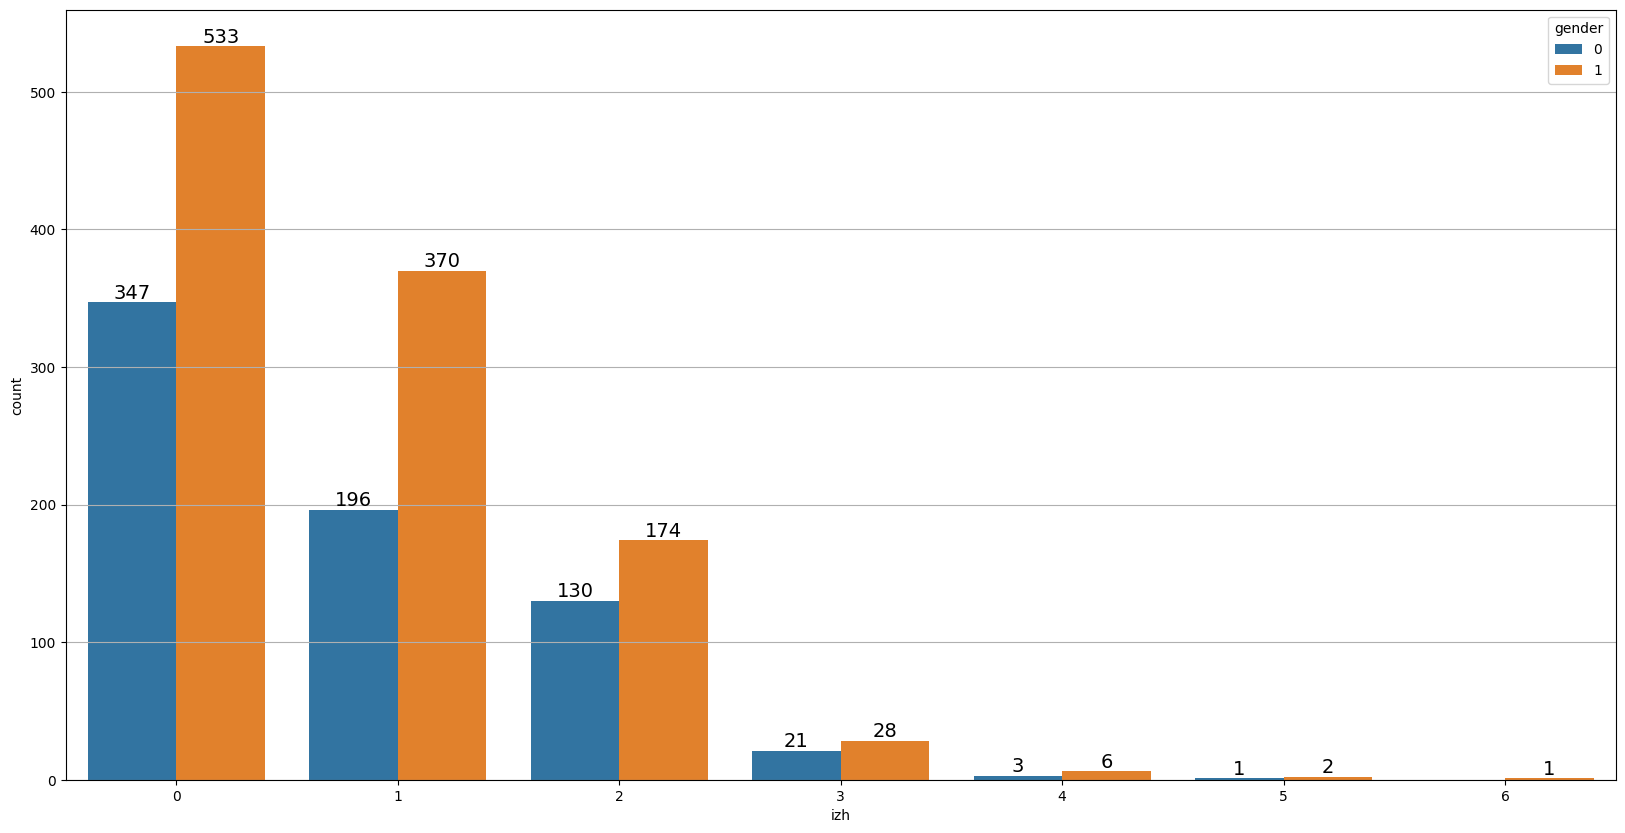

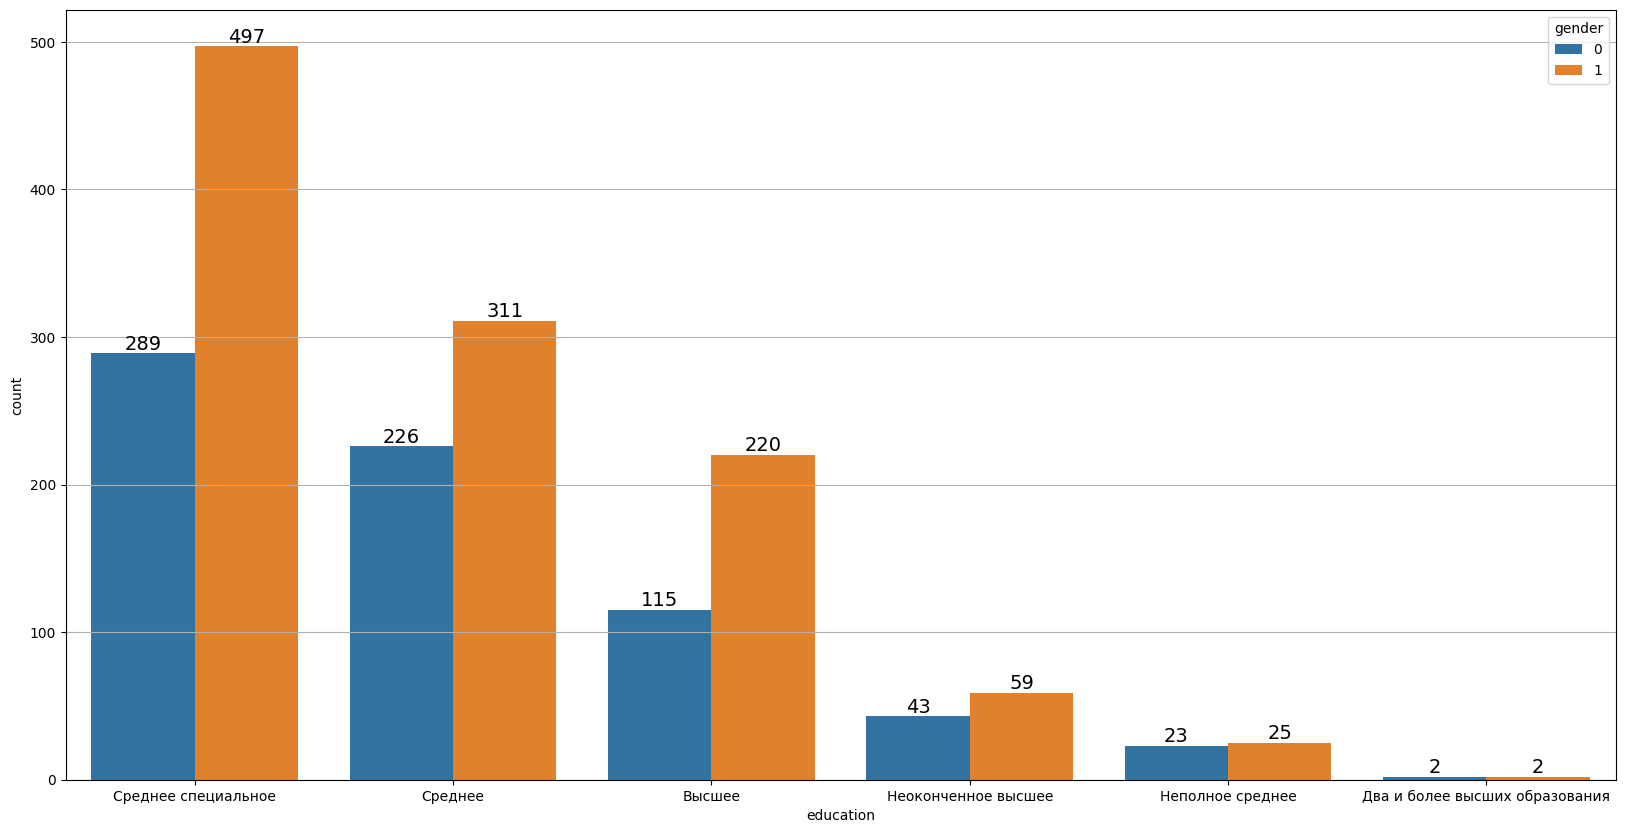

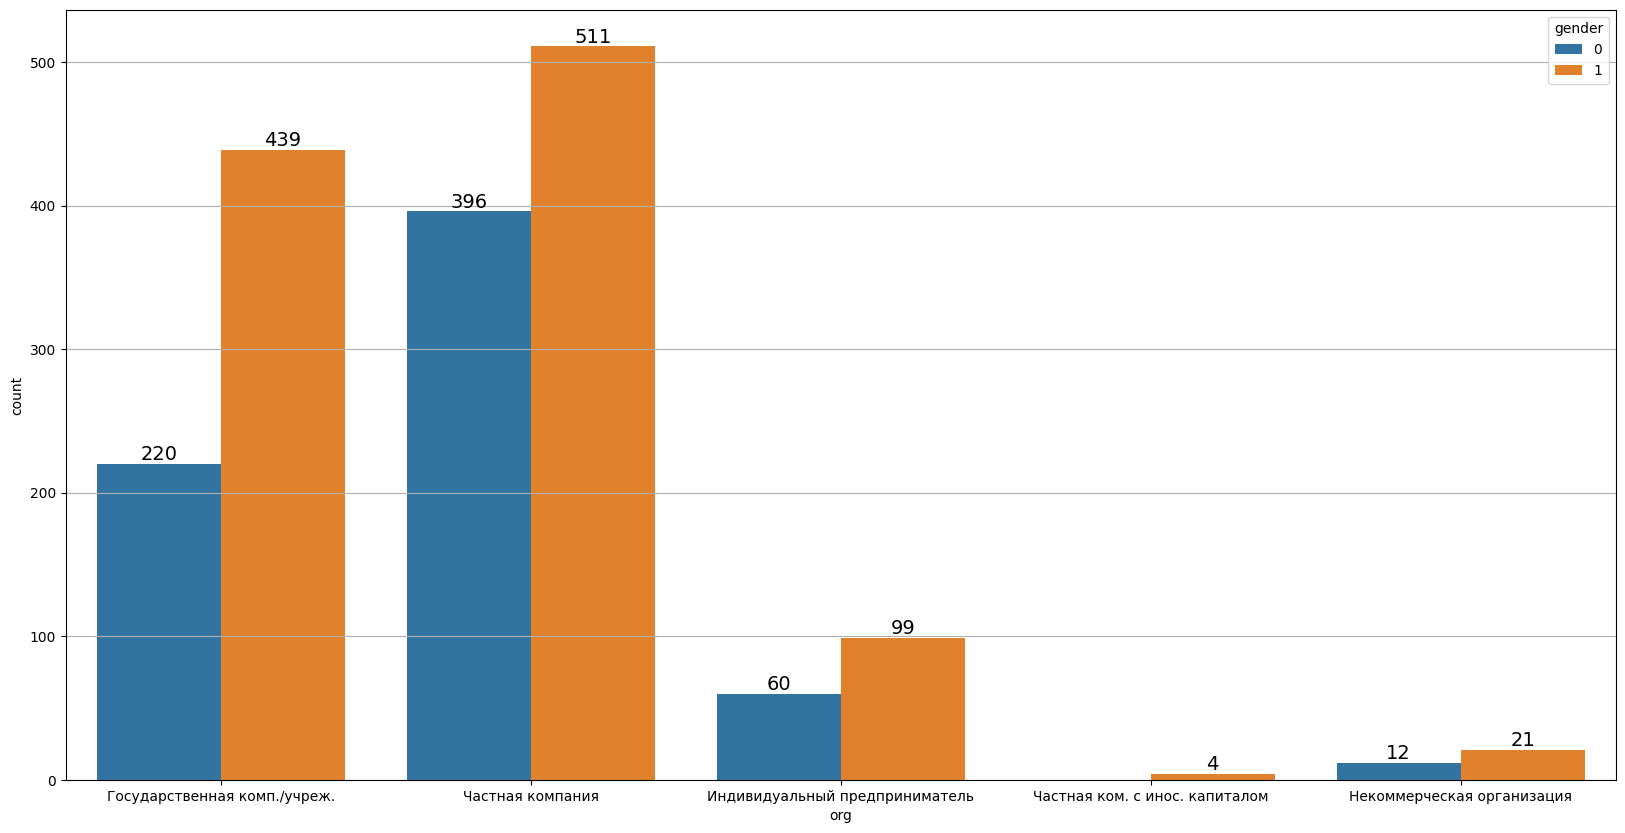

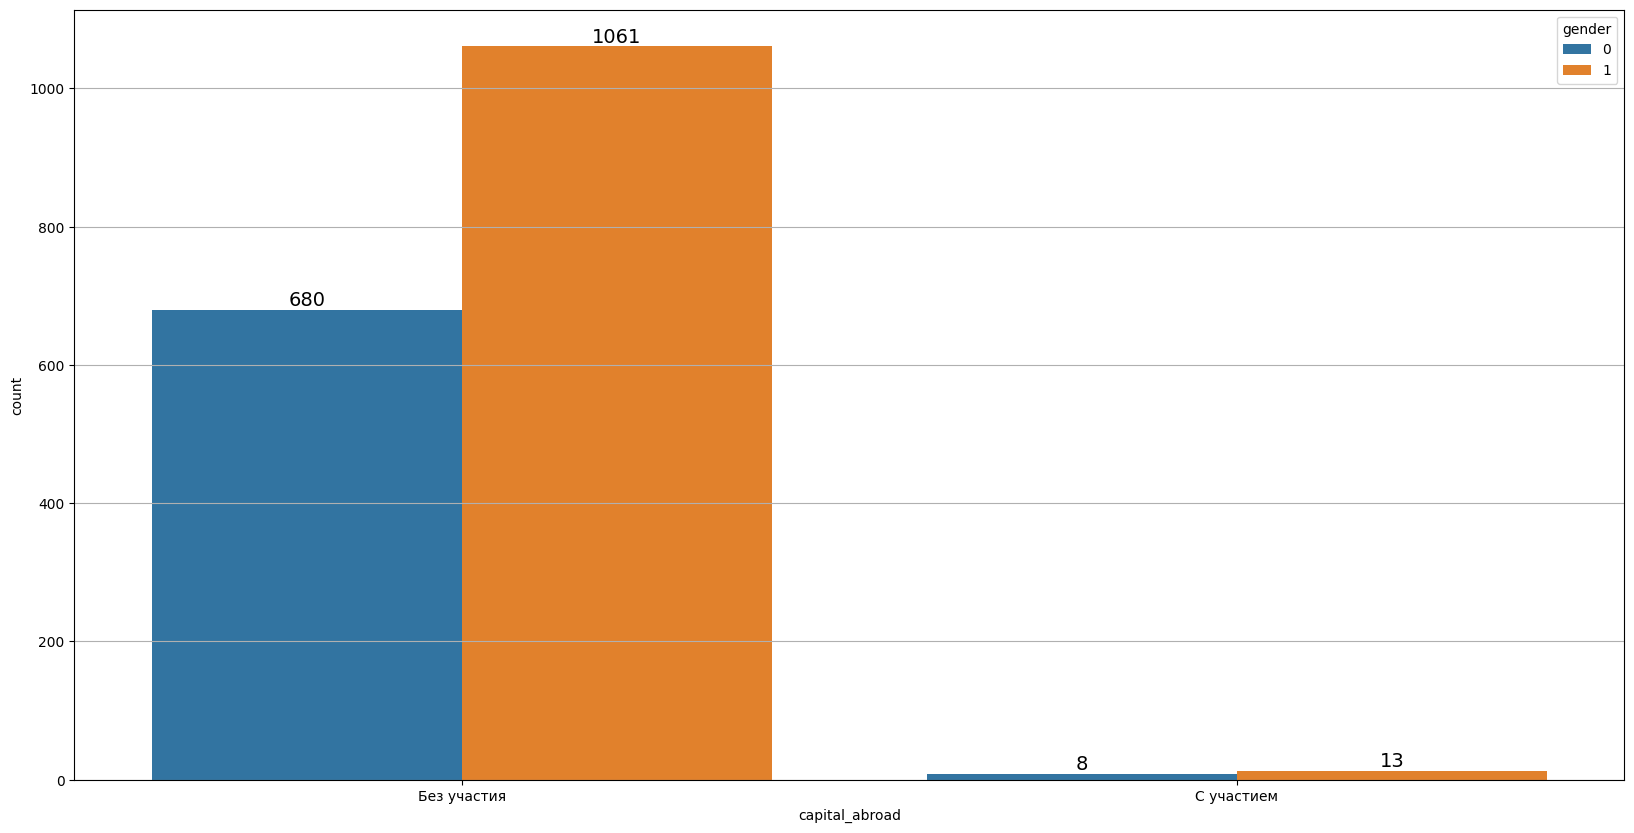

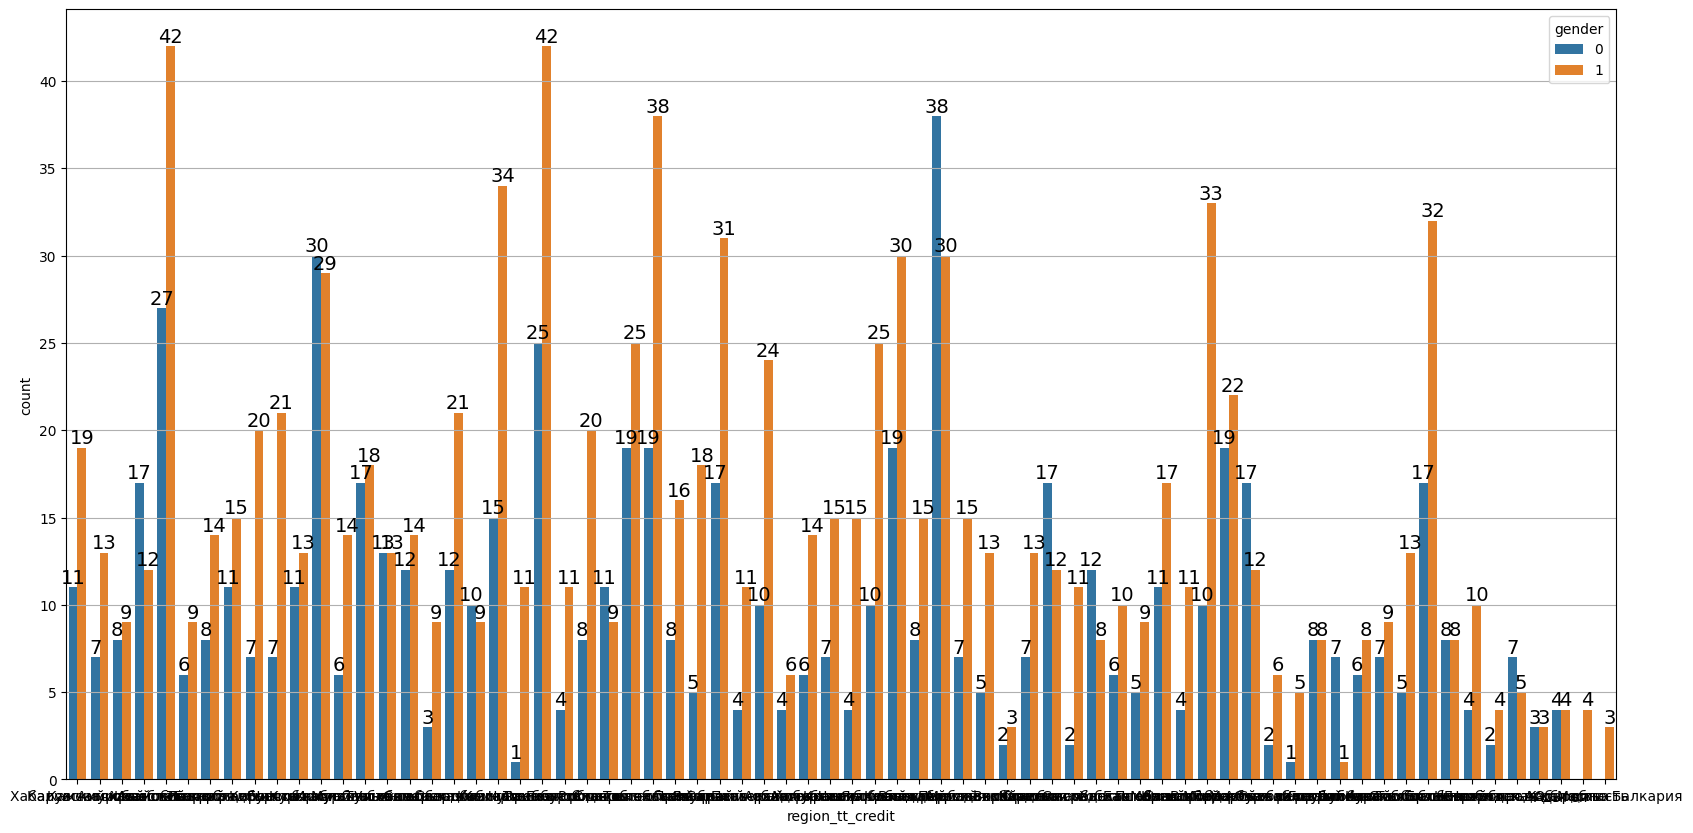

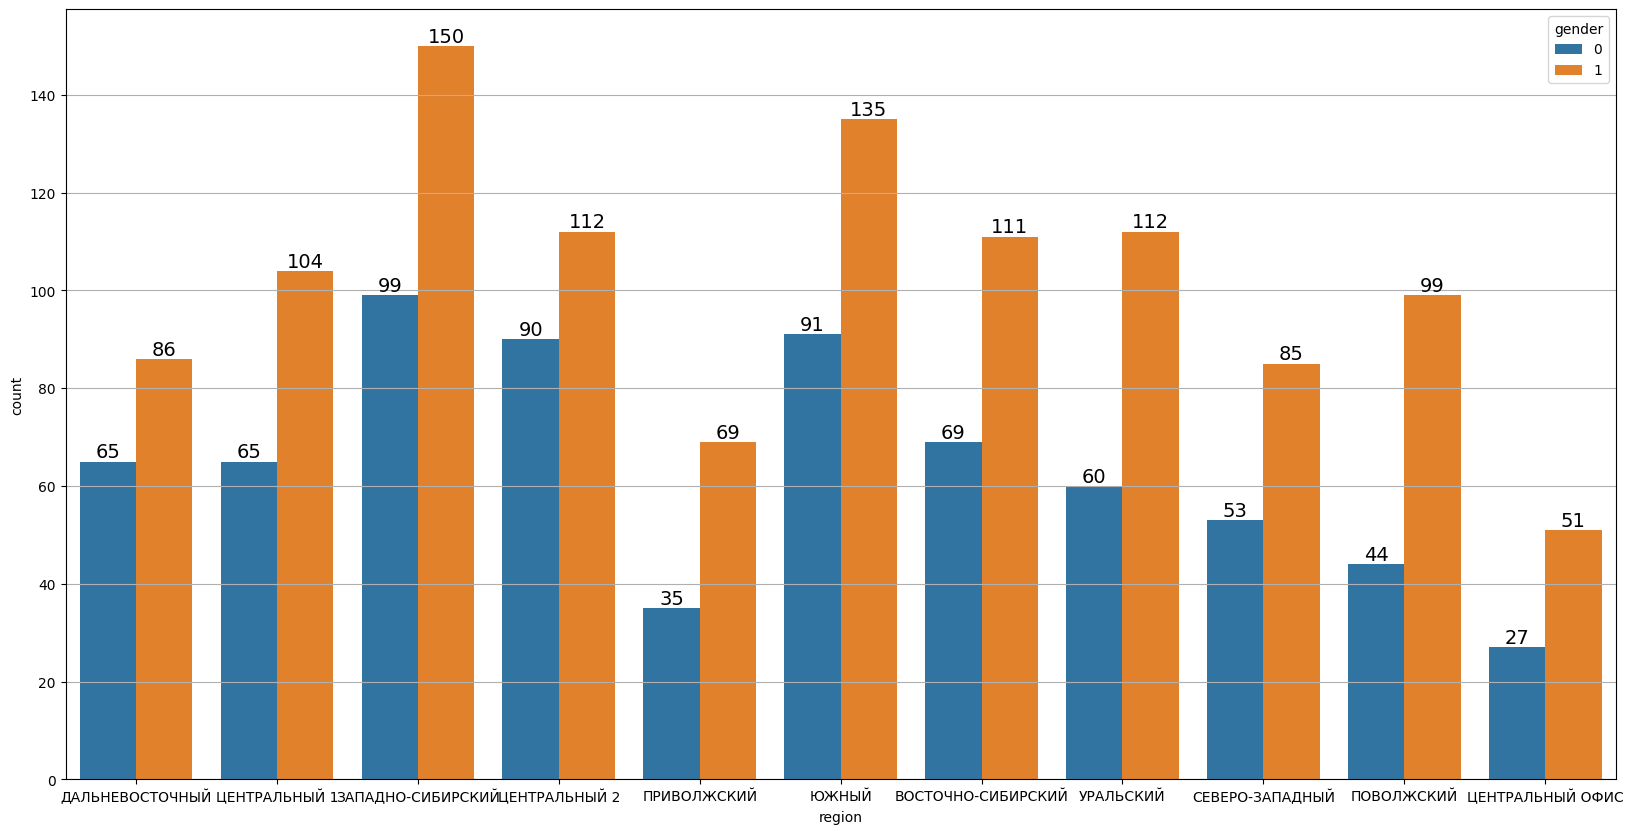

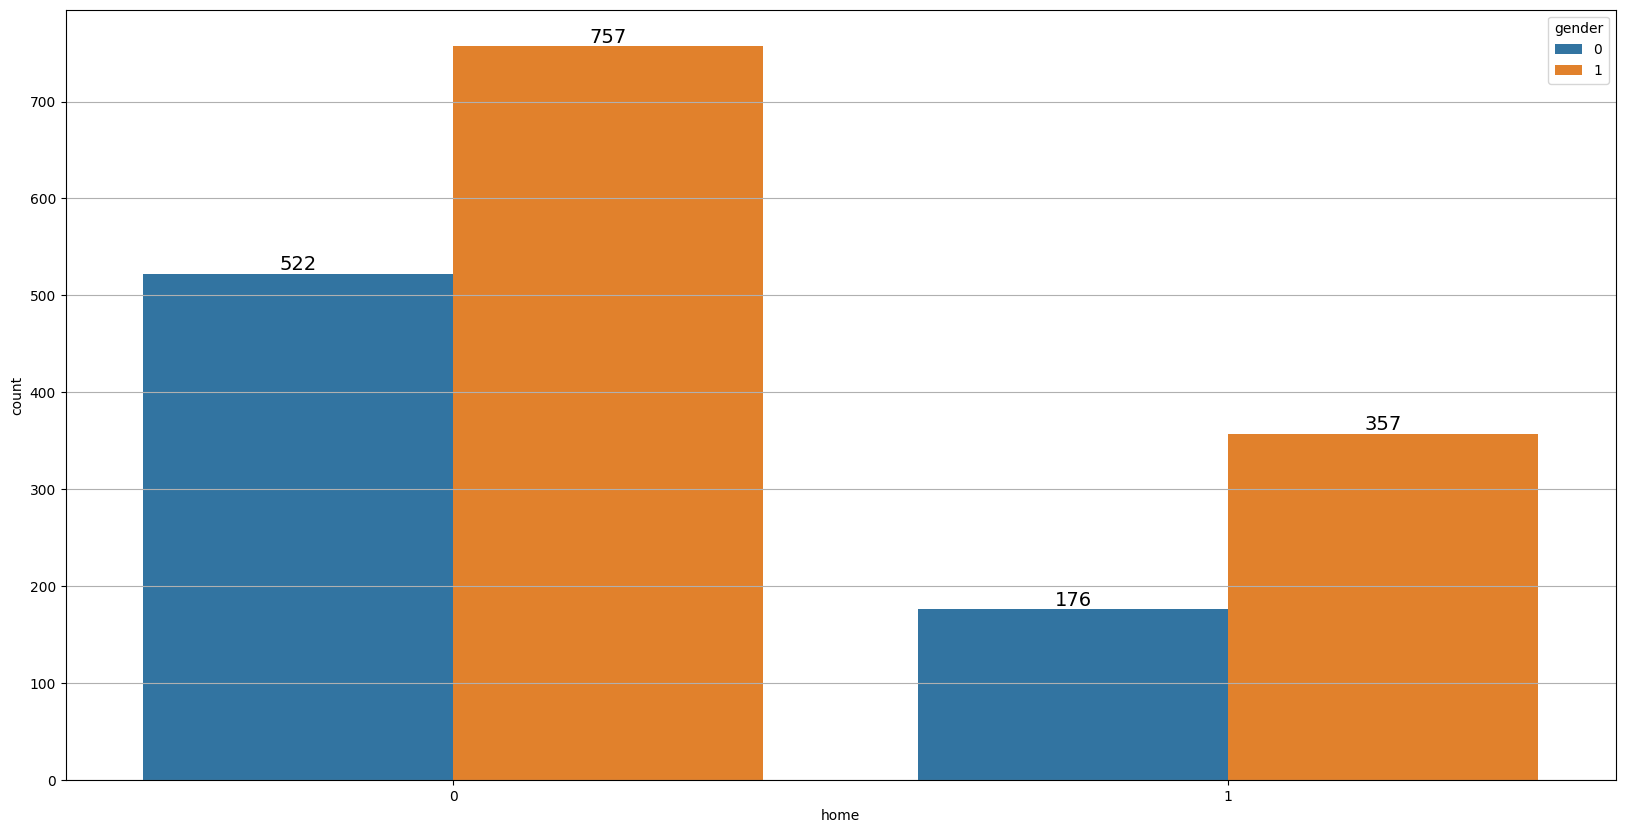

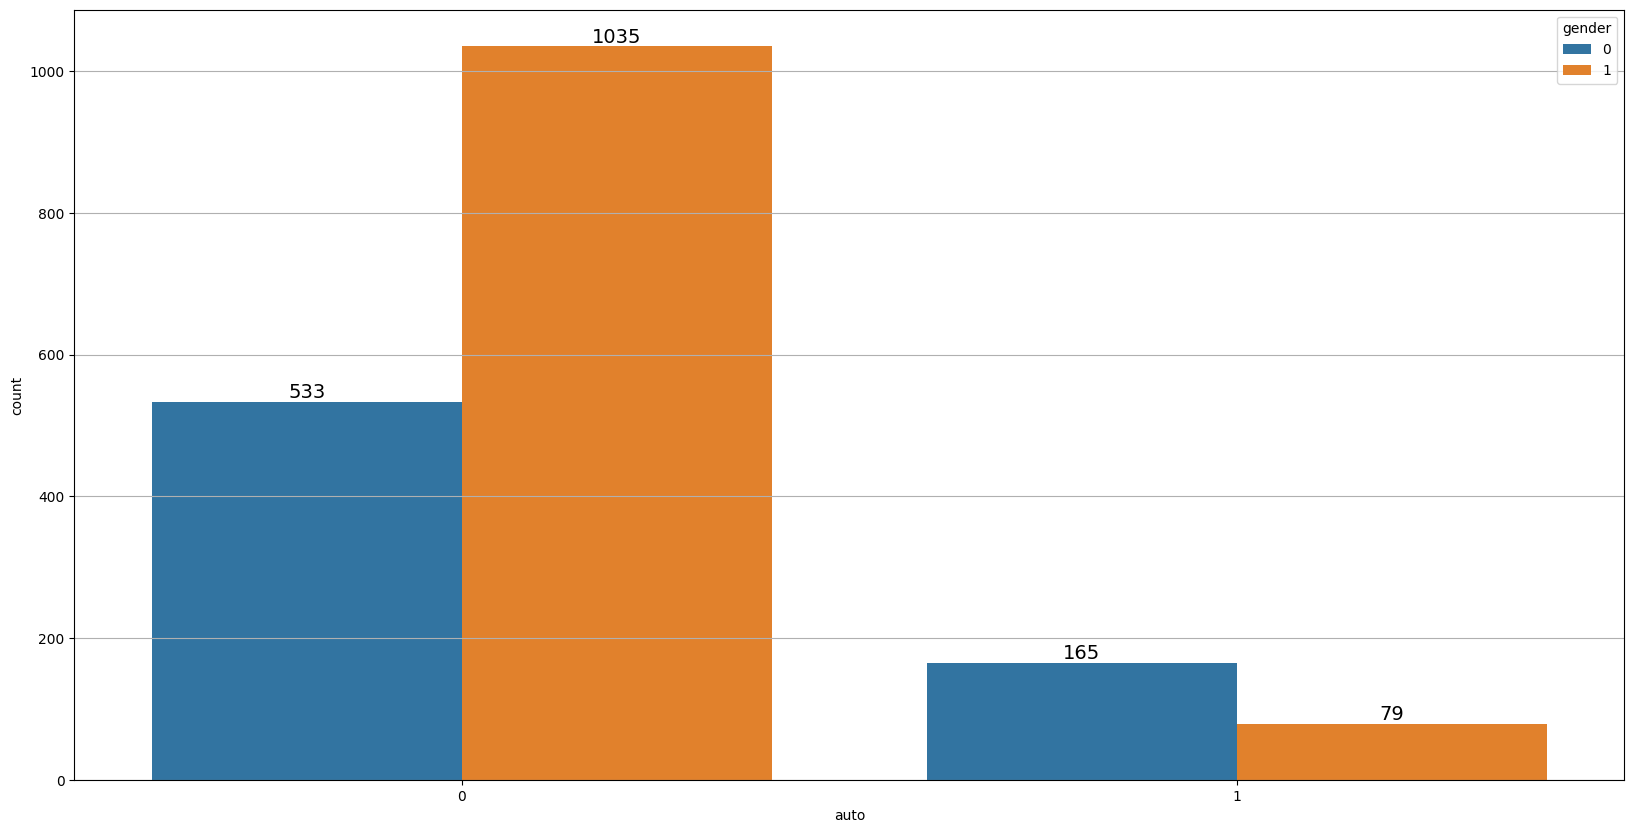

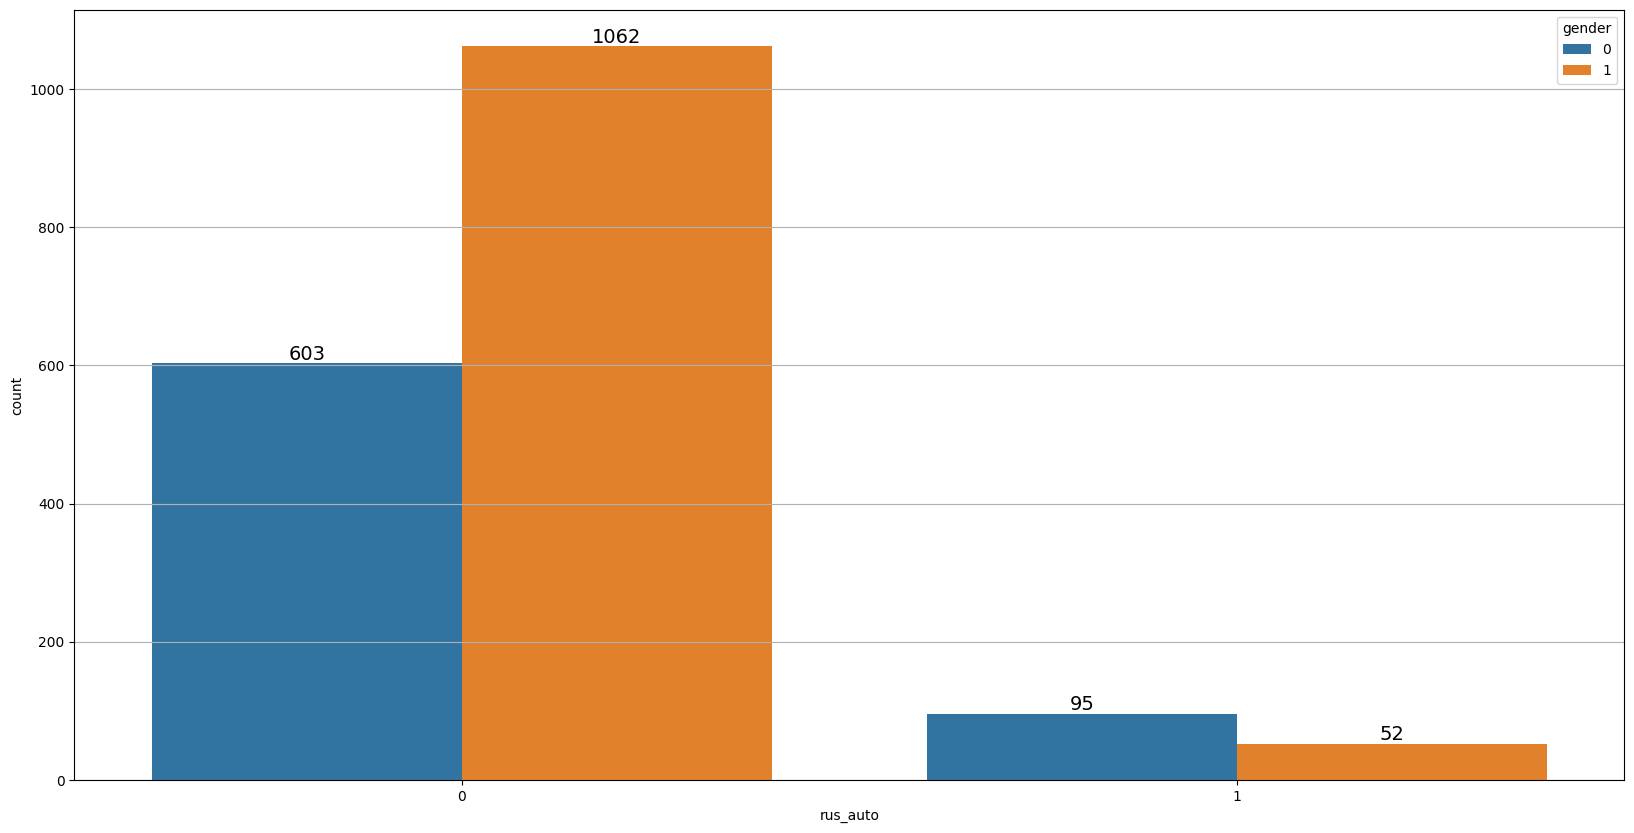

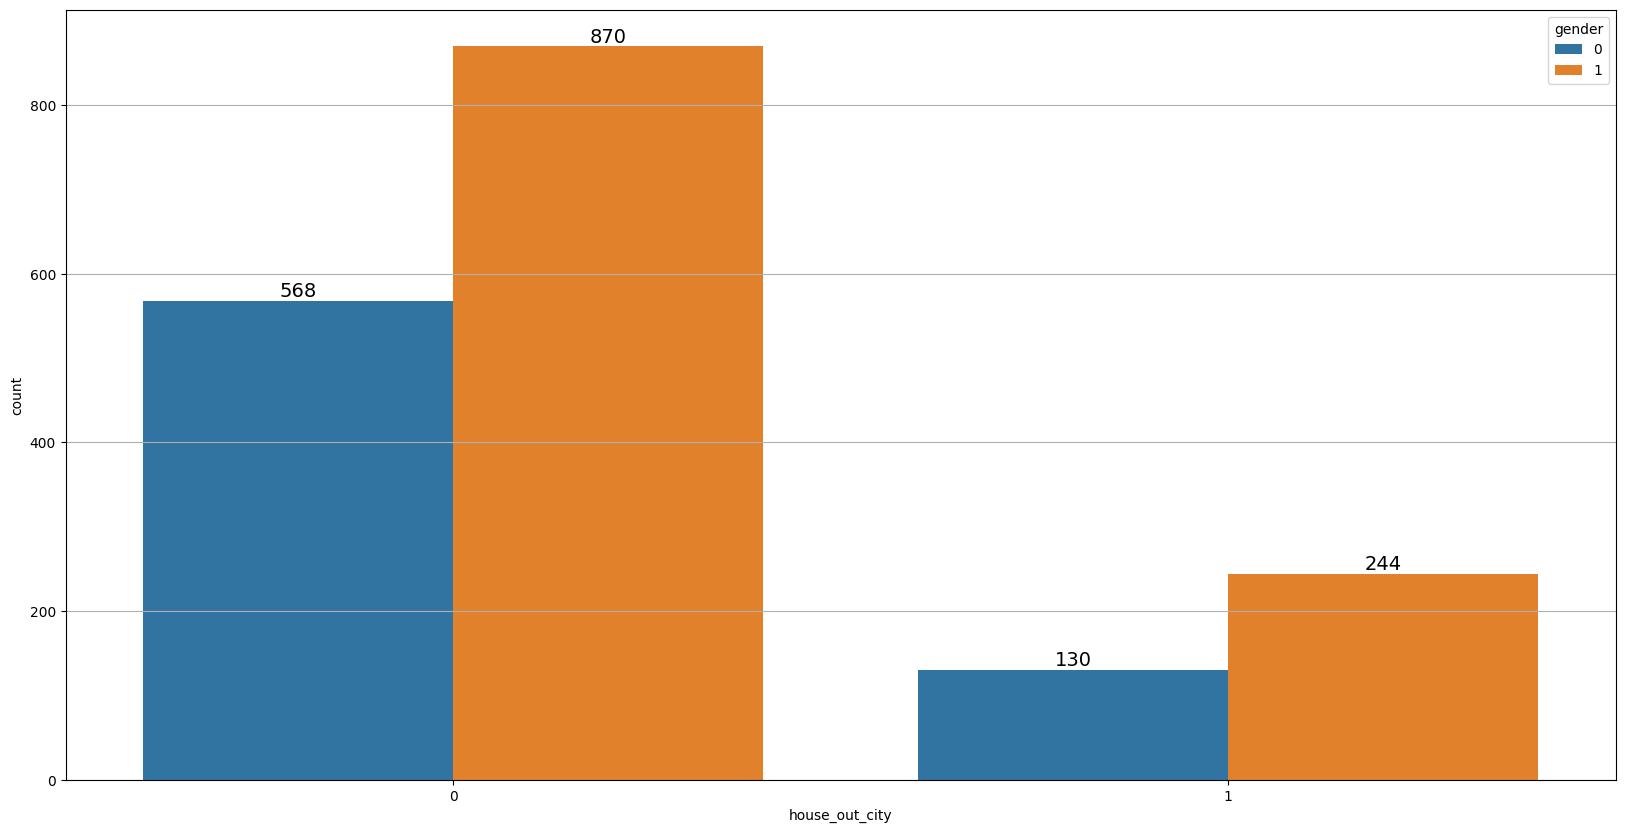

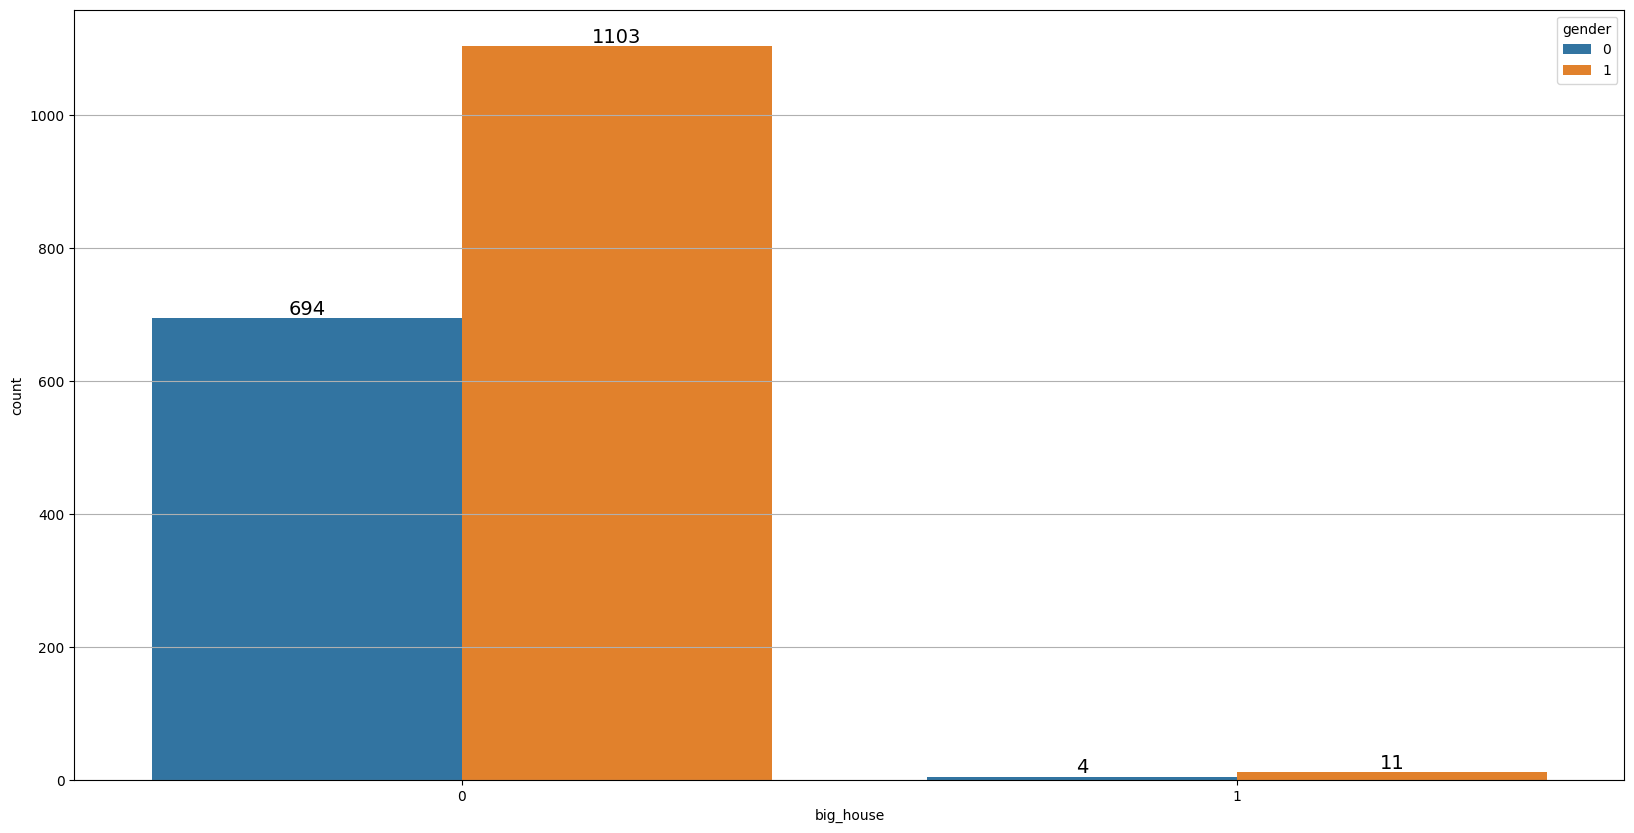

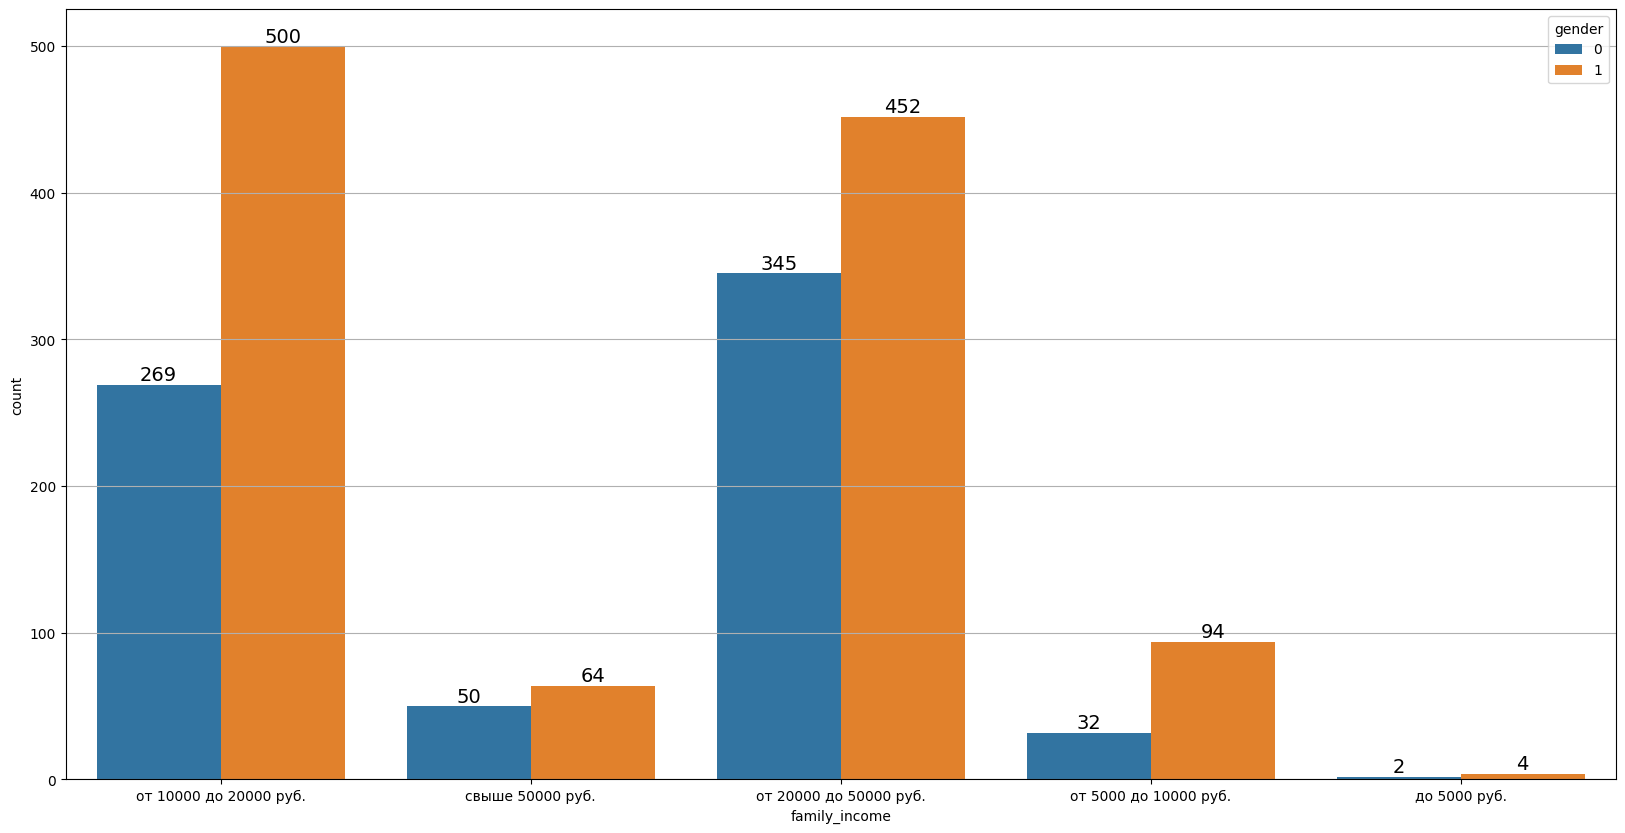

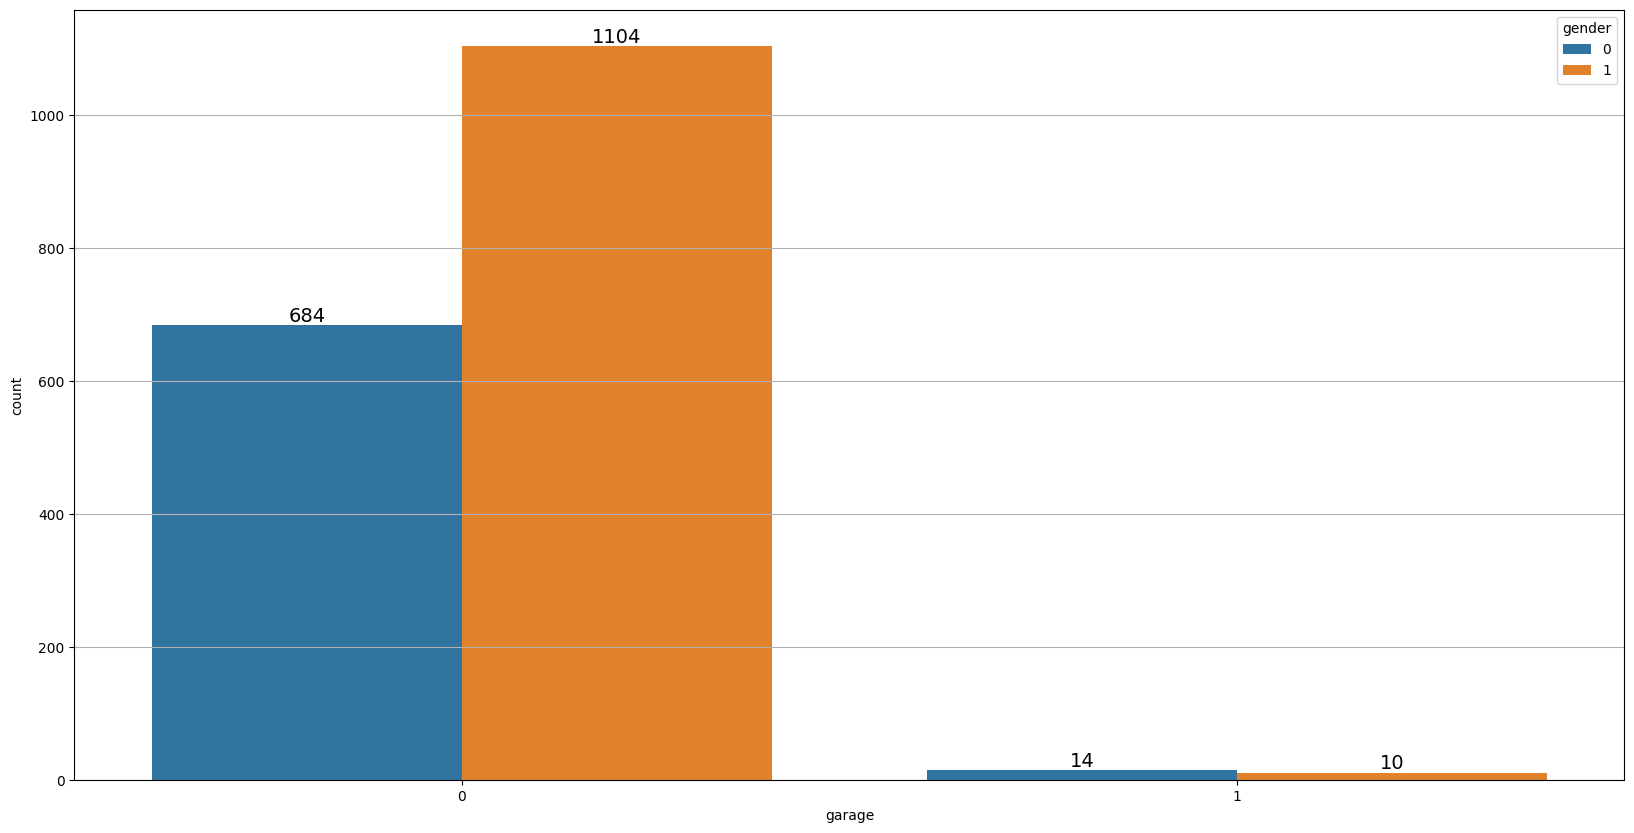

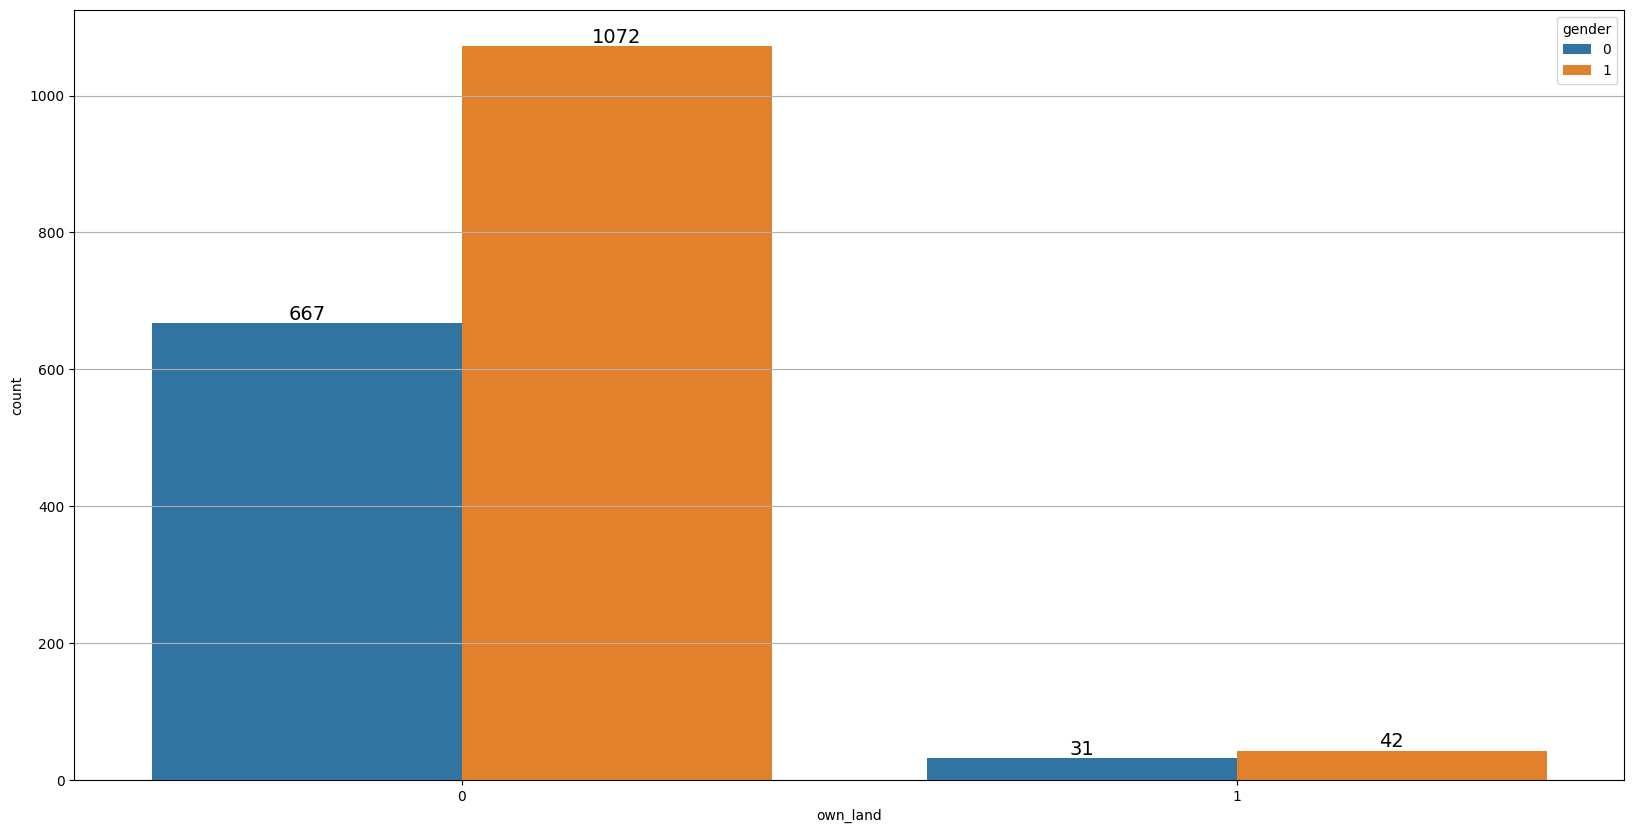

In [86]:
for col in lst_cat2:
    fig, ax = plt.subplots(figsize=(20,10))
    sns.countplot(x = data1[col], hue= 'gender', data = data1)
    plt.grid(axis='y')
    for container in ax.containers:
        ax.bar_label(container, fontsize=14)
        


Таким образом, рекомендуется настроить рекламу на следующих пользователей:    
##### 1 сегмент: 
- мужчина;
- возрастной диапозон: 22 - 42;
- работающий;
- должность: специалист, рабочий;
- количество детей: 0-2;
- на иждивении не находится никого/ 1-2 человека находятся на иждивении;
- образование: среднее или средне-специальное;
- не имеют в собственности квартиры, автомобиля, загородных домов и коттеджов, гаража и собственной земли;
- живет с семьей;
- доход семьи от 10 до 50 тысяч рублей, персональный доход в среднем составляет 16 173 рубля;
- сумма кредита в среднем 12 тысяч рублей;
- просрочки по кредиту отсутствуют.

##### 2 сегмент:
- женщина;
- возрастной диапозон: 22 - 42;
- работающая;
- должность: специалист, рабочий;
- количество детей: 0-2;
- на иждивении не находится никого/ 1-2 человека находятся на иждивении;
- образование: среднее, средне-специальное, высшее;
- не имеют в собственности квартиры, автомобиля, загородных домов и коттеджов, гаража и собственной земли;
- живет с семьей;
- доход семьи от 10 до 50 тысяч рублей, персональный доход в среднем составляет 16 173 рубля;
- сумма кредита в среднем 12 тысяч рублей;
- просрочки по кредиту отсутствуют.